<a href="https://colab.research.google.com/github/EdoardoPalazzi/cis5500-egot-app/blob/main/CIS5500_datasets_eda_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIS 5500 - Project**


---


Milestone 1: [Project Proposal](https://docs.google.com/document/d/1C_rmh2xOHniA3QUIHQFJVtMKseFFNwVO/edit?usp=sharing&ouid=102917050372331528558&rtpof=true&sd=true)



Team: Brendan Brett | Edoardo Palazzi | Eitan Jacob

# Importing the Initial Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


In [ ]:
# ----------  READ ME -----------
# INSTRUCTIONS FOR ACCESSING DATA
# Navigate to the shared Google Drive data folder: https://drive.google.com/drive/folders/1O8hRx974c3FmsGyo0Yub7M9Bzip1AKTV?usp=drive_link
# Click on Data > Organize > Add Shortcut
# Place the shortcut in your Google Drive in a folder called CIS5500
file_path = '/content/drive/My Drive/CIS5500/data'

print('Filepath set.')

Filepath set.


In [ ]:
# EGOT Award Datasets

# Emmy's
# Award History: Sourced https://www.kaggle.com/datasets/unanimad/emmy-awards, disaggregated by project team
emmy_awards = pd.read_table(file_path + '/emmys/emmy_award_history.tsv')

# Grammy's
# Award History: Scraped by project team via grammys.com
grammy_awards = pd.read_table(file_path + '/grammys/grammy_award_history.tsv', header='infer')
# grammy_awards_faulty = pd.read_csv(file_path + '/the_grammy_awards_faulty.csv')

# Oscar's
# Award History: Scraped by project team via oscars.com
oscar_awards = pd.read_table(file_path + '/oscars/oscar_award_history.tsv')

# Tony's
# Award History: Scraped by project team via https://www.ibdb.com/awards
tony_awards = pd.read_table(file_path + '/tonys/tony_award_history.tsv')

# EGOTs:
# List of all EGOTs: sourced from wikipedia
egot_winners = pd.read_csv(file_path + '/egot/egot_winners.csv')

print('Datasets loaded into DataFrames')

Datasets loaded into DataFrames


In [ ]:
# Let's rename some columns for easier comparison
# Putting this at the top for easier execution of the notebook

# Grammys
grammy_awards = grammy_awards.rename(columns={'winner': 'win', 'award': 'category'})

# Oscars
oscar_awards = oscar_awards.rename(columns={'winner': 'win', 'year_ceremony': 'year', 'Category': 'category', 'name': 'nominee'})
# oscar_awards['win'].replace({'Y': 1, 'N': 0}, inplace=True)

print('Columns have been renamed.')

Columns have been renamed.


# Awards - Preliminary EDA

## Emmy Awards



In [ ]:
# Set award
award = 'Emmy Award'

df = emmy_awards

# Begin Award DB stats
# # of rows with values by column
print(f'{award} DB:')
print(df.shape)

Emmy Award DB:
(62054, 9)


In [ ]:
# Confirm beginning and end year of data
first_year = df['year'].min()
last_year = df['year'].max()
print(f'{award} DB:')
print(f'Beginning with year {first_year}, ending with {last_year}')
print(f'Total years: {last_year-first_year}')

Emmy Award DB:
Beginning with year 1949, ending with 2019
Total years: 70


In [ ]:
# Award DB stats
print(f'{award} DB')
print(df.info())

Emmy Award DB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62054 entries, 0 to 62053
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   origin_id  62054 non-null  int64 
 1   year       62054 non-null  int64 
 2   category   62054 non-null  object
 3   title      61898 non-null  object
 4   nominee    61352 non-null  object
 5   role       37493 non-null  object
 6   company    61509 non-null  object
 7   producer   30130 non-null  object
 8   win        62054 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.8+ MB
None


In [ ]:
# Do the columns contain nulls
print(f'{award} DB:')
print(df.isnull().any())

Emmy Award DB:
origin_id    False
year         False
category     False
title         True
nominee       True
role          True
company       True
producer      True
win          False
dtype: bool


In [ ]:
# Get count of nulls per column
print(f'{award} DB:')
print(df.count())

print('Nulls per column: ')
print(df.isnull().sum())

Emmy Award DB:
origin_id    62054
year         62054
category     62054
title        61898
nominee      61352
role         37493
company      61509
producer     30130
win          62054
dtype: int64
Nulls per column: 
origin_id        0
year             0
category         0
title          156
nominee        702
role         24561
company        545
producer     31924
win              0
dtype: int64


In [ ]:
# Datatypes
print(f'{award} DB:')
print(df.dtypes)

Emmy Award DB:
origin_id     int64
year          int64
category     object
title        object
nominee      object
role         object
company      object
producer     object
win            bool
dtype: object


In [ ]:
# Show head
print(f'{award} DB:')
df.head()

Emmy Award DB:


,origin_id,year,category,title,nominee,role,company,producer,win
0,1,2019,Outstanding Character Voice-Over Performance,The Simpsons,Hank Azaria,"as Moe, Carl, Duffman, Kirk",FOX,Gracie Films in association with 20th Century ...,False
1,2,2019,Outstanding Character Voice-Over Performance,Family Guy,Alex Borstein,"as Lois Griffin, Tricia Takanawa",FOX,20th Century Fox Television,False
2,3,2019,Outstanding Character Voice-Over Performance,When You Wish Upon A Pickle: A Sesame Street S...,Eric Jacobson,"as Bert, Grover, Oscar",HBO,Sesame Street Workshop,False
3,4,2019,Outstanding Character Voice-Over Performance,F Is For Family,Kevin Michael Richardson,as Rosie,Netflix,Wild West Television in association with Gaumo...,False
4,5,2019,Outstanding Production Design For A Narrative ...,Escape At Dannemora,Mark Ricker,Production Designer,Showtime,"Red Hour, Busyhands, The White Mountain Compan...",False


In [ ]:
# Describe the dataframe to spot any anomalies
df.describe(include='all')

,origin_id,year,category,title,nominee,role,company,producer,win
count,62054.000000,62054.000000,62054,61898,61352,37493,61509,30130,62054
unique,NaN,NaN,1332,5615,22952,3384,247,1273,2
top,NaN,NaN,Outstanding Comedy Series,Saturday Night Live,Lorne Michaels,Executive Producer,NBC,SNL Studios in association with Universal Tele...,False
freq,NaN,NaN,2101,1230,91,5070,12179,1299,48508
mean,9027.907919,2000.548732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5699.831090,15.138144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1949.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4160.000000,1992.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8592.500000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13415.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check win column
print(f'{award} DB:')
df['win'].describe()

Emmy Award DB:


count     62054
unique        2
top       False
freq      48508
Name: win, dtype: object

In [ ]:
# Check percentage of winners
print(f'{award} DB:')
df["win"].value_counts(normalize=True)

Emmy Award DB:


win
False    0.781706
True     0.218294
Name: proportion, dtype: float64

Emmy Award DB:


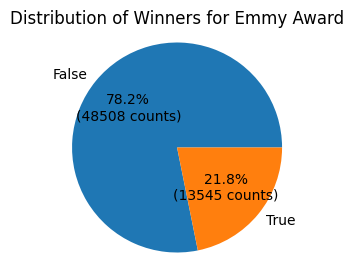

In [ ]:
# Check for validity of winner vs. nominees
print(f'{award} DB:')

import matplotlib.pyplot as plt

winner_counts = df['win'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(winner_counts, labels=winner_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*len(df))} counts)")
plt.title(f'Distribution of Winners for {award}')
plt.axis('equal')
plt.show()

In [ ]:
# Check category percentages
print(f'{award} DB:')
df["category"].value_counts(normalize=True)

Emmy Award DB:


category
Outstanding Comedy Series                                                                  0.033858
Outstanding Drama Series                                                                   0.030780
Outstanding Sound Editing For A Series                                                     0.019306
Outstanding Sound Editing For A Miniseries, Movie Or A Special                             0.015567
Outstanding Technical Direction, Camerawork, Video For A Miniseries, Movie Or A Special    0.012973
                                                                                             ...   
MUSICIAN OF THE YEAR                                                                       0.000016
FILM EDITOR OF THE YEAR                                                                    0.000016
DIRECTOR OF THE YEAR-SPECIAL                                                               0.000016
DIRECTOR OF THE YEAR-SERIES                                                                

In [ ]:
# Statistics on categories
columns_of_interest = ['category', 'win']
df.groupby(['year'])[columns_of_interest].describe(percentiles=[])

category                                                                 \
        count unique                                                top freq   
year                                                                           
1949       25      6                    MOST POPULAR TELEVISION PROGRAM   10   
1950       36      9  BEST FILM MADE FOR & VIEWED ON TELEVISION IN 1949    6   
1951       67     15                                BEST PUBLIC SERVICE    6   
1952       35      6                        BEST COMEDIAN OR COMEDIENNE    7   
1953       67     12                            BEST CHILDREN'S PROGRAM    7   
...       ...    ...                                                ...  ...   
2015     2212    113            Outstanding Reality-Competition Program   89   
2016     2350    115            Outstanding Reality-Competition Program   93   
2017     2486    121  Outstanding Technical Direction, Camerawork, V...   96   
2018     2660    122  Outstanding Technical Direction, Camerawork, V...  109   
2019     2681    126                       Outstanding Animated Program  102   

       win                      
     count unique    top  freq  
year                            
1949    25      2  False    18  
1950    36      2  False    27  
1951    67      2  False    52  
1952    35      2  False    29  
1953    67      2  False    54  
...    ...    ...    ...   ...  
2015  2212      2  False  1719  
2016  2350      2  False  1888  
2017  2486      2  False  1964  
2018  2660      2  False  2194  
2019  2681      2  False  2182  

[71 rows x 8 columns]

Top 20 Award Categories Chart

<ipython-input-19-895f239cd920>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


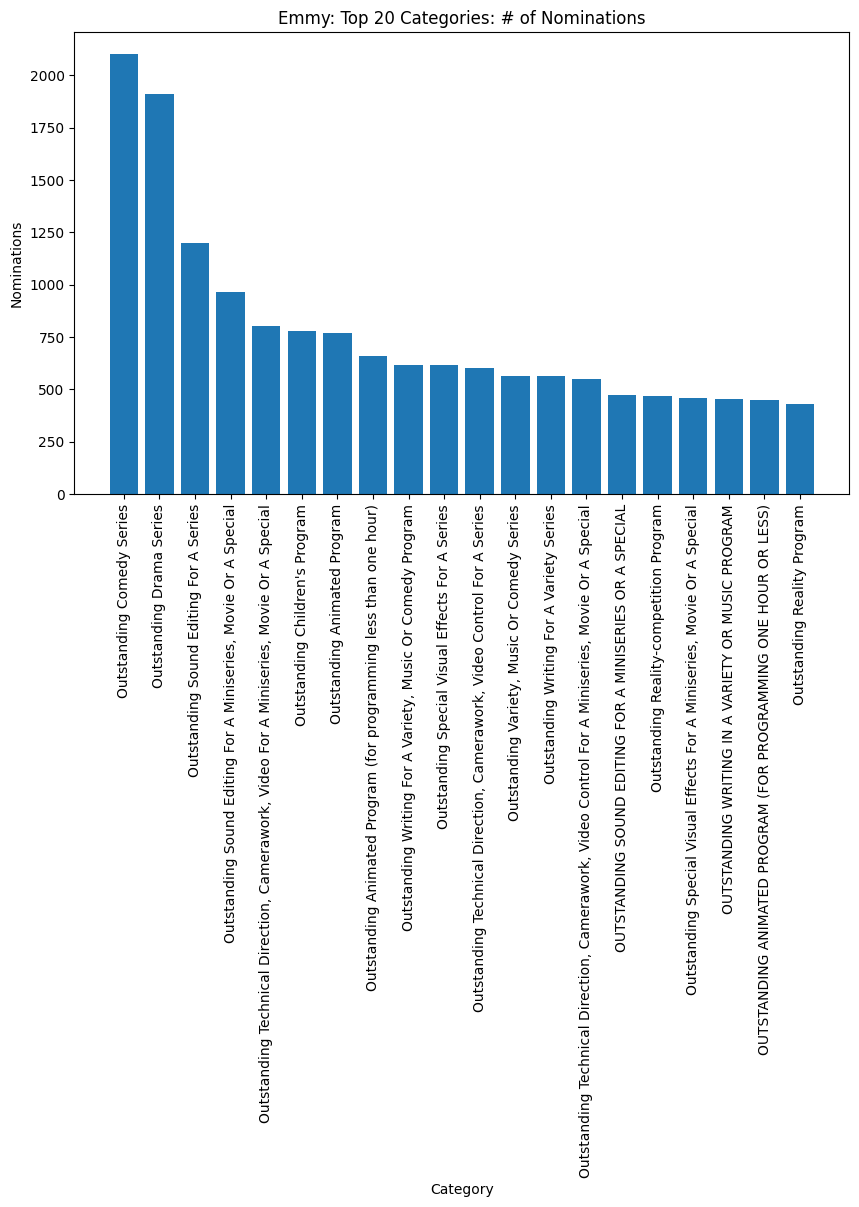

In [ ]:
eda_results= {}

# Value Counts for Categorical Columns (shortened)
categorical_columns = df.select_dtypes(include=['object'])
value_counts = {}
for column in categorical_columns:
    value_counts[column] = df[column].value_counts().head(20)  # Top 20 most common values

eda_results['value_counts'] = value_counts

# Calculate and plot amounts and percentages of the top 20 categories
top_categories = value_counts['category']
total_categories = top_categories.sum()
category_amounts = top_categories.values
category_percentages = (category_amounts / total_categories) * 100

plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, category_amounts)
plt.xlabel('Category')
plt.ylabel('Nominations')
plt.title('Emmy: Top 20 Categories: # of Nominations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show(block=False)


Emmy Award DB:
Total years: 71
Axes(0.125,0.11;0.775x0.77)


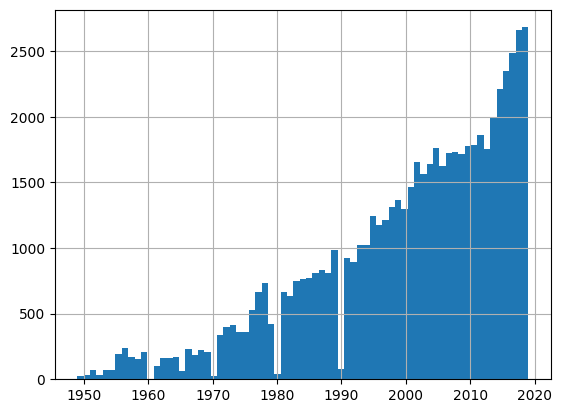

In [ ]:
# Histogram to see number of awards per year
print(f'{award} DB:')
year_count = df['year'].nunique()
print(f'Total years: {year_count}')
print(df['year'].hist(bins=year_count))

## Grammy Awards



In [ ]:
# Set award
award = 'Grammy Award'

df = grammy_awards

# Begin Award DB stats
# # of rows with values by column
print(f'{award} DB:')
print(df.shape)

Grammy Award DB:
(62023, 5)


In [ ]:
# Confirm beginning and end year of data
first_year = df['year'].min()
last_year = df['year'].max()
print(f'{award} DB:')
print(f'Beginning with year {first_year}, ending with {last_year}')
print(f'Total years: {last_year-first_year}')

Grammy Award DB:
Beginning with year 1958, ending with 2023
Total years: 65


In [ ]:
# Award DB stats
print(f'{award} DB')
print(df.info())

Grammy Award DB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62023 entries, 0 to 62022
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      62023 non-null  int64 
 1   category  62023 non-null  object
 2   title     61255 non-null  object
 3   nominee   62023 non-null  object
 4   win       62023 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.0+ MB
None


In [ ]:
# Do the columns contain nulls
print(f'{award} DB:')
print(df.isnull().any())

Grammy Award DB:
year        False
category    False
title        True
nominee     False
win         False
dtype: bool


In [ ]:
# Get count of nulls per column
print(f'{award} DB:')
print(df.isnull().sum())

Grammy Award DB:
year          0
category      0
title       768
nominee       0
win           0
dtype: int64


In [ ]:
# Datatypes
print(f'{award} DB:')
print(df.dtypes)

Grammy Award DB:
year         int64
category    object
title       object
nominee     object
win           bool
dtype: object


In [ ]:
# Show head
print(f'{award} DB:')
df.head()

Grammy Award DB:


,year,category,title,nominee,win
0,1960,Record Of The Year,The Theme From A Summer Place,Percy Faith,True
1,1960,Record Of The Year,Nice 'N Easy (Single),Frank Sinatra,False
2,1960,Record Of The Year,Mack The Knife (Single),Ella Fitzgerald,False
3,1960,Record Of The Year,Georgia On My Mind (Single),Ray Charles,False
4,1960,Record Of The Year,Are You Lonesome Tonight? (Single),Elvis Presley,False


In [ ]:
# Describe the dataframe to spot any anomalies
df.describe(include='all')

,year,category,title,nominee,win
count,62023.000000,62023,61255,62023,62023
unique,NaN,797,20638,21984,2
top,NaN,Album Of The Year,Donda,Jay-Z,False
freq,NaN,3561,164,88,47551
mean,1999.326879,NaN,NaN,NaN,NaN
std,16.435421,NaN,NaN,NaN,NaN
min,1958.000000,NaN,NaN,NaN,NaN
25%,1988.000000,NaN,NaN,NaN,NaN
50%,2002.000000,NaN,NaN,NaN,NaN
75%,2012.000000,NaN,NaN,NaN,NaN


In [ ]:
# Check win column
print(f'{award} DB:')
df['win'].describe()

Grammy Award DB:


count     62023
unique        2
top       False
freq      47551
Name: win, dtype: object

In [ ]:
# Check percentage of winners
print(f'{award} DB:')
df["win"].value_counts(normalize=True)

Grammy Award DB:


win
False    0.766667
True     0.233333
Name: proportion, dtype: float64

Grammy Award DB:


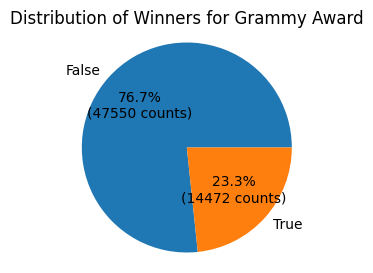

In [ ]:
# Check for validity of winner vs. nominees
print(f'{award} DB:')

import matplotlib.pyplot as plt

winner_counts = df['win'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(winner_counts, labels=winner_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*len(df))} counts)")
plt.title(f'Distribution of Winners for {award}')
plt.axis('equal')
plt.show()

In [ ]:
# Check category percentages
print(f'{award} DB:')
df["category"].value_counts(normalize=True)

Grammy Award DB:


category
Album Of The Year                                                       0.057414
Best Opera Recording                                                    0.026780
Record Of The Year                                                      0.026377
Best Chamber Music Performance                                          0.014366
Best Metal Performance                                                  0.013801
                                                                          ...   
Best Classical Performance-Instrumental Soloist (Without Orchestra)     0.000064
Best New Classical Artist                                               0.000064
Best Engineered Record (Classical)                                      0.000064
Best Original Cast Album (Broadway Or TV)                               0.000064
Best Sound Track Album, Original Cast - Motion Picture Or Television    0.000048
Name: proportion, Length: 797, dtype: float64

In [ ]:
# Statistics on categories
columns_of_interest = ['category', 'win']
df.groupby(['year'])[columns_of_interest].describe(percentiles=[])

category                                                                 \
        count unique                                                top freq   
year                                                                           
1958      196     28  Best Classical Performance - Chamber Music (In...   19   
1959      199     34        Best Performance By A Vocal Group Or Chorus   11   
1960      297     39         Best Performance By A Vocal Group (2 To 6)   17   
1961      264     40                  Best Performance By A Vocal Group   17   
1962      312     39                  Best Performance By A Vocal Group   18   
...       ...    ...                                                ...  ...   
2019     1311     84                                 Record Of The Year   65   
2020     1250     84                                  Album Of The Year   61   
2021     1886     86                                  Album Of The Year  545   
2022     1905     91                                  Album Of The Year  432   
2023     1341     94                                  Album Of The Year   85   

       win                      
     count unique    top  freq  
year                            
1958   196      2  False   156  
1959   199      2  False   157  
1960   297      2  False   254  
1961   264      2  False   213  
1962   312      2  False   260  
...    ...    ...    ...   ...  
2019  1311      2  False   973  
2020  1250      2  False   912  
2021  1886      2  False  1493  
2022  1905      2  False  1501  
2023  1341      2  False  1048  

[66 rows x 8 columns]

Grammy Award DB:
Total years: 66
Axes(0.125,0.11;0.775x0.77)


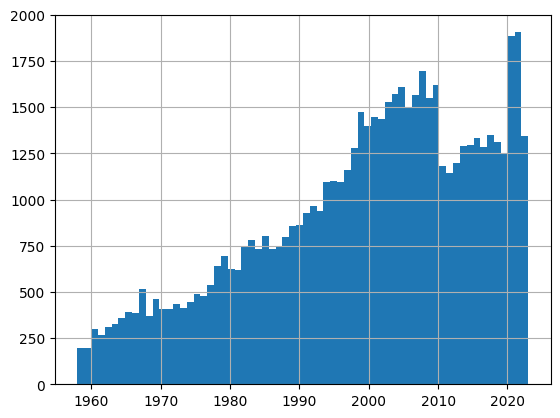

In [ ]:
# Histogram to see number of awards per year
print(f'{award} DB:')
year_count = df['year'].nunique()
print(f'Total years: {year_count}')
print(df['year'].hist(bins=year_count))

Top Twenty Award Categories

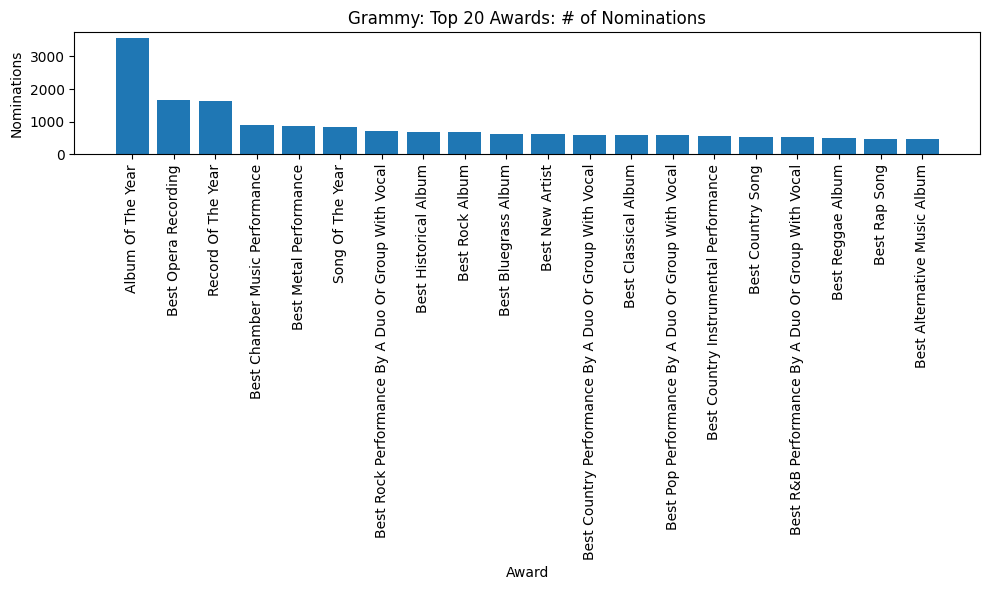

In [ ]:
# Value Counts for Categorical Columns (shortened)
categorical_columns = df.select_dtypes(include=['object'])
value_counts = {}
for column in categorical_columns:
    value_counts[column] = df[column].value_counts().head(20)  # Top 20 most common values

eda_results = {}
eda_results['value_counts'] = value_counts

# Calculate and plot amounts and percentages of the top 20 categories
top_categories = value_counts['category']
total_categories = top_categories.sum()
category_amounts = top_categories.values
category_percentages = (category_amounts / total_categories) * 100

plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, category_amounts)
plt.xlabel('Award')
plt.ylabel('Nominations')
plt.title('Grammy: Top 20 Awards: # of Nominations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Oscar Awards



In [ ]:
# Set award
award = 'Oscar Award'

df = oscar_awards

# Begin Award DB stats
# # of rows with values by column
print(f'{award} DB:')
print(df.shape)

df.head()

Oscar Award DB:
(10563, 5)


,year,category,nominee,win,film
0,1928,ACTOR,Richard Barthelmess,False,The Noose
1,1928,ACTOR,Emil Jannings,True,The Last Command
2,1928,ACTRESS,Louise Dresser,False,A Ship Comes In
3,1928,ACTRESS,Janet Gaynor,True,7th Heaven
4,1928,ACTRESS,Gloria Swanson,False,Sadie Thompson


In [ ]:
# Confirm beginning and end year of data
first_year = df['year'].min()
last_year = df['year'].max()
print(f'{award} DB:')
print(f'Beginning with year {first_year}, ending with {last_year}')
print(f'Total years: {last_year-first_year}')

Oscar Award DB:
Beginning with year 1928, ending with 2022
Total years: 94


In [ ]:
# Award DB stats
print(f'{award} DB')
print(df.info())

Oscar Award DB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10563 entries, 0 to 10562
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      10563 non-null  int64 
 1   category  10563 non-null  object
 2   nominee   10563 non-null  object
 3   win       10563 non-null  bool  
 4   film      10445 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 340.5+ KB
None


In [ ]:
# Do the columns contain nulls
print(f'{award} DB:')
print(df.isnull().any())

Oscar Award DB:
year        False
category    False
nominee     False
win         False
film         True
dtype: bool


In [ ]:
# Get count of nulls per column
print(f'{award} DB:')
print(df.isnull().sum())

Oscar Award DB:
year          0
category      0
nominee       0
win           0
film        118
dtype: int64


In [ ]:
# Datatypes
print(f'{award} DB:')
print(df.dtypes)

Oscar Award DB:
year         int64
category    object
nominee     object
win           bool
film        object
dtype: object


In [ ]:
# Show head
print(f'{award} DB:')
df.head()

Oscar Award DB:


,year,category,nominee,win,film
0,1928,ACTOR,Richard Barthelmess,False,The Noose
1,1928,ACTOR,Emil Jannings,True,The Last Command
2,1928,ACTRESS,Louise Dresser,False,A Ship Comes In
3,1928,ACTRESS,Janet Gaynor,True,7th Heaven
4,1928,ACTRESS,Gloria Swanson,False,Sadie Thompson


In [ ]:
# Describe the dataframe to spot any anomalies
df.describe(include='all')

,year,category,nominee,win,film
count,10563.000000,10563,10563,10563,10445
unique,NaN,108,6754,2,4988
top,NaN,DIRECTING,Metro-Goldwyn-Mayer,False,A Star Is Born
freq,NaN,464,64,8323,25
mean,1976.143425,NaN,NaN,NaN,NaN
std,26.980787,NaN,NaN,NaN,NaN
min,1928.000000,NaN,NaN,NaN,NaN
25%,1952.000000,NaN,NaN,NaN,NaN
50%,1975.000000,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN


In [ ]:
# Check win column
print(f'{award} DB:')
df['win'].describe()

Oscar Award DB:


count     10563
unique        2
top       False
freq       8323
Name: win, dtype: object

In [ ]:
# Check percentage of winners
print(f'{award} DB:')
df["win"].value_counts(normalize=True)

Oscar Award DB:


win
False    0.787939
True     0.212061
Name: proportion, dtype: float64

Oscar Award DB:


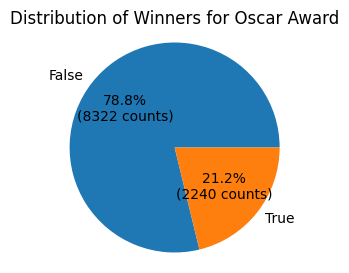

In [ ]:
# Check for validity of winner vs. nominees
print(f'{award} DB:')

import matplotlib.pyplot as plt

winner_counts = df['win'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(winner_counts, labels=winner_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*len(df))} counts)")
plt.title(f'Distribution of Winners for {award}')
plt.axis('equal')
plt.show()

In [ ]:
# Check category percentages
print(f'{award} DB:')
df["category"].value_counts(normalize=True)

Oscar Award DB:


category
DIRECTING                                    0.043927
FILM EDITING                                 0.042128
ACTOR IN A SUPPORTING ROLE                   0.041181
ACTRESS IN A SUPPORTING ROLE                 0.041087
DOCUMENTARY (Short Subject)                  0.035785
                                               ...   
ENGINEERING EFFECTS                          0.000284
DIRECTING (Dramatic Picture)                 0.000284
DIRECTING (Comedy Picture)                   0.000189
SPECIAL ACHIEVEMENT AWARD (Sound Editing)    0.000095
SPECIAL ACHIEVEMENT AWARD (Sound Effects)    0.000095
Name: proportion, Length: 108, dtype: float64

In [ ]:
# Statistics on categories
columns_of_interest = ['category', 'win']
df.groupby(['year'])[columns_of_interest].describe(percentiles=[])

category                                       win                   
        count unique                     top freq count unique    top freq
year                                                                      
1928       33     12                 ACTRESS    3    33      2  False   20
1929       38      7                 ACTRESS    6    38      2  False   31
1930       42      8                   ACTOR    6    42      2  False   34
1931       44      9                   ACTOR    5    44      2  False   35
1932      106     13  OUTSTANDING PRODUCTION   18   106      2  False   74
...       ...    ...                     ...  ...   ...    ...    ...  ...
2018      122     25            BEST PICTURE    8   122      2  False   97
2019      125     25            BEST PICTURE    9   125      2  False  100
2020      118     24            BEST PICTURE    8   118      2  False   93
2021      121     24            BEST PICTURE   10   121      2  False   97
2022      121     24            BEST PICTURE   10   121      2  False   97

[94 rows x 8 columns]

Top Award Categories Chart

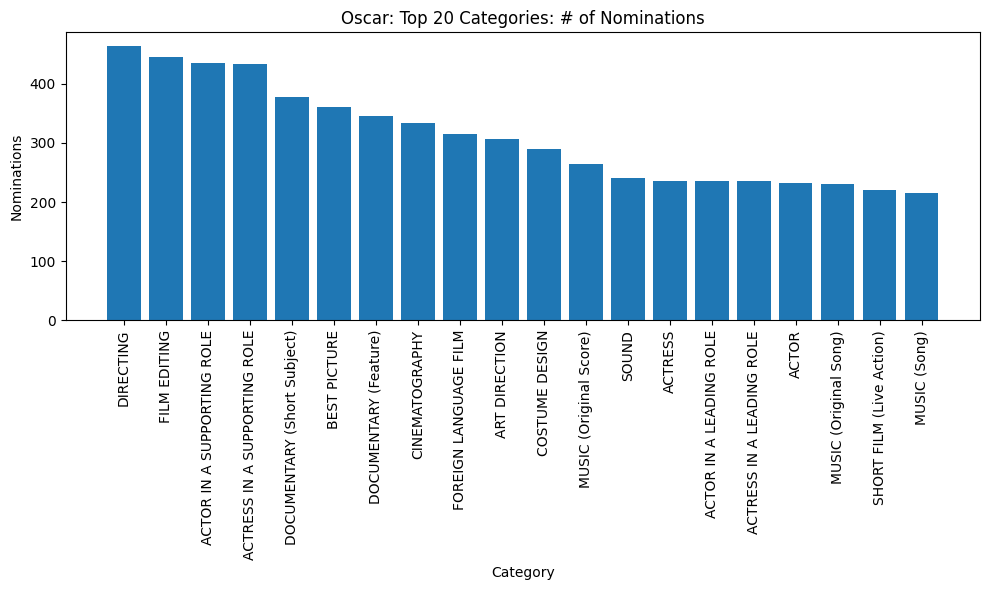

In [ ]:
# Value Counts for Categorical Columns (shortened)
categorical_columns = df.select_dtypes(include=['object'])
value_counts = {}
for column in categorical_columns:
    value_counts[column] = df[column].value_counts().head(20)  # Top 20 most common values

eda_results['value_counts'] = value_counts

# Calculate and plot amounts and percentages of the top 20 categories
top_categories = value_counts['category']
total_categories = top_categories.sum()
category_amounts = top_categories.values
category_percentages = (category_amounts / total_categories) * 100

plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, category_amounts)
plt.xlabel('Category')
plt.ylabel('Nominations')
plt.title('Oscar: Top 20 Categories: # of Nominations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show(block=False)

Oscar Award DB:
Total years: 94
Axes(0.125,0.11;0.775x0.77)


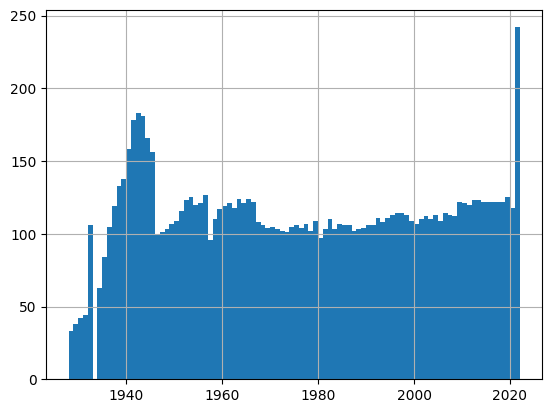

In [ ]:
# Histogram to see number of awards per year
print(f'{award} DB:')
year_count = df['year'].nunique()
print(f'Total years: {year_count}')
print(df['year'].hist(bins=year_count))

## Tony Awards



In [ ]:
# Set award
award = 'Tony Award'

df = tony_awards

# Begin Award DB stats
# # of rows with values by column
print(f'{award} DB:')
print(df.shape)

Tony Award DB:
(13017, 6)


In [ ]:
# Confirm beginning and end year of data
first_year = df['year'].min()
last_year = df['year'].max()
print(f'{award} DB:')
print(f'Beginning with year {first_year}, ending with {last_year}')
print(f'Total years: {last_year-first_year}')

Tony Award DB:
Beginning with year 1947, ending with 2023
Total years: 76


In [ ]:
# Award DB stats
print(f'{award} DB')
print(df.info())

Tony Award DB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13017 entries, 0 to 13016
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         13017 non-null  int64 
 1   category     13017 non-null  object
 2   nominee      13017 non-null  object
 3   win          13017 non-null  object
 4   performance  13017 non-null  object
 5   nominee_id   12688 non-null  object
dtypes: int64(1), object(5)
memory usage: 610.3+ KB
None


In [ ]:
# Do the columns contain nulls
print(f'{award} DB:')
print(df.isnull().any())

Tony Award DB:
year           False
category       False
nominee        False
win            False
performance    False
nominee_id      True
dtype: bool


In [ ]:
# Get count of nulls per column
print(f'{award} DB:')
print(df.isnull().sum())

Tony Award DB:
year             0
category         0
nominee          0
win              0
performance      0
nominee_id     329
dtype: int64


In [ ]:
# Datatypes
print(f'{award} DB:')
print(df.dtypes)

Tony Award DB:
year            int64
category       object
nominee        object
win            object
performance    object
nominee_id     object
dtype: object


In [ ]:
# Show head
print(f'{award} DB:')
df.head()

Tony Award DB:


,year,category,nominee,win,performance,nominee_id
0,2023,Best Play,Sonia Friedman Productions,Winner,Leopoldstadt,sonia-friedman-productions-108722
1,2023,Best Play,Roy Furman,Winner,Leopoldstadt,roy-furman-91627
2,2023,Best Play,Lorne Michaels,Winner,Leopoldstadt,lorne-michaels-7374
3,2023,Best Play,Stephanie P. McClelland,Winner,Leopoldstadt,stephanie-p-mcclelland-478527
4,2023,Best Play,Gavin Kalin,Winner,Leopoldstadt,gavin-kalin-527235


In [ ]:
# Describe the dataframe to spot any anomalies
df.describe(include='all')

,year,category,nominee,win,performance,nominee_id
count,13017.000000,13017,13017,13017,13017,12688
unique,NaN,111,5892,3,1374,5691
top,NaN,Best Musical,Roger Berlind,Nominee,No Associated Performance,roger-berlind-23702
freq,NaN,2371,53,9076,329,53
mean,1998.432588,NaN,NaN,NaN,NaN,NaN
std,20.602456,NaN,NaN,NaN,NaN,NaN
min,1947.000000,NaN,NaN,NaN,NaN,NaN
25%,1983.000000,NaN,NaN,NaN,NaN,NaN
50%,2005.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check win column
print(f'{award} DB:')
df['win'].describe()

Tony Award DB:


count       13017
unique          3
top       Nominee
freq         9076
Name: win, dtype: object

In [ ]:
# Check percentage of winners
print(f'{award} DB:')
df["win"].value_counts(normalize=True)

Tony Award DB:


win
Nominee      0.697242
Winner       0.268572
Recipient    0.034186
Name: proportion, dtype: float64

Tony Award DB:


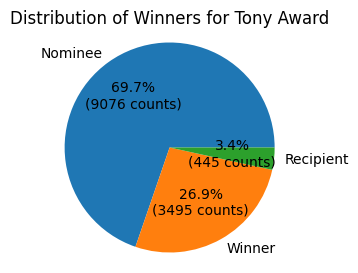

In [ ]:
# Check for validity of winner vs. nominees
print(f'{award} DB:')

import matplotlib.pyplot as plt

winner_counts = df['win'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(winner_counts, labels=winner_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*len(df))} counts)")
plt.title(f'Distribution of Winners for {award}')
plt.axis('equal')
plt.show()

In [ ]:
# Check category percentages
print(f'{award} DB:')
df["category"].value_counts(normalize=True)

Tony Award DB:


category
Best Musical                 0.182146
Best Play                    0.155412
Best Revival of a Play       0.088961
Best Revival of a Musical    0.060613
Best Original Score          0.025275
                               ...   
Best Actor (Dramatic)        0.000077
Brooks Atkinson Award        0.000077
Musical Conductor            0.000077
Theatre Award '83            0.000077
Best Actress (Dramatic)      0.000077
Name: proportion, Length: 111, dtype: float64

In [ ]:
# Statistics on categories
columns_of_interest = ['category', 'win']
df.groupby(['year'])[columns_of_interest].describe(percentiles=[])

category                                       win                     
        count unique                     top freq count unique      top freq
year                                                                        
1947       24     11           Special Award    7    24      2   Winner   17
1948       40     17           Special Award    8    40      2   Winner   22
1949       29     18      Best Scenic Design    5    29      1   Winner   29
1950       32     18            Best Musical    8    32      2   Winner   29
1951       25     18            Best Musical    5    25      2   Winner   24
...       ...    ...                     ...  ...   ...    ...      ...  ...
2018      433     32  Best Revival of a Play  118   433      3  Nominee  274
2019      481     31            Best Musical  194   481      3  Nominee  351
2020      780     29               Best Play  226   780      3  Nominee  502
2022      472     32            Best Musical  155   472      3  Nominee  324
2023      518     31            Best Musical  115   518      3  Nominee  408

[76 rows x 8 columns]

Top 20 Award Category Chart

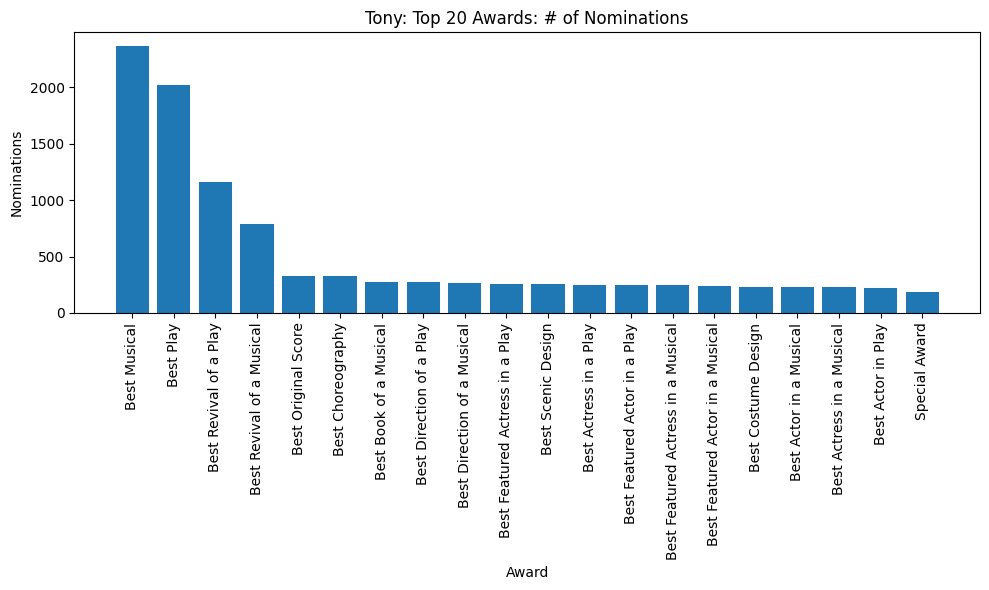

In [ ]:
# Value Counts for Categorical Columns (shortened)
categorical_columns = df.select_dtypes(include=['object'])
value_counts = {}
for column in categorical_columns:
    value_counts[column] = df[column].value_counts().head(20)  # Top 20 most common values

eda_results['value_counts'] = value_counts

# Calculate and plot amounts and percentages of the top 20 categories
top_categories = value_counts['category']
total_categories = top_categories.sum()
category_amounts = top_categories.values
category_percentages = (category_amounts / total_categories) * 100

plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, category_amounts)
plt.xlabel('Award')
plt.ylabel('Nominations')
plt.title('Tony: Top 20 Awards: # of Nominations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show(block=False)


Tony Award DB:
Total years: 76
Axes(0.125,0.11;0.775x0.77)


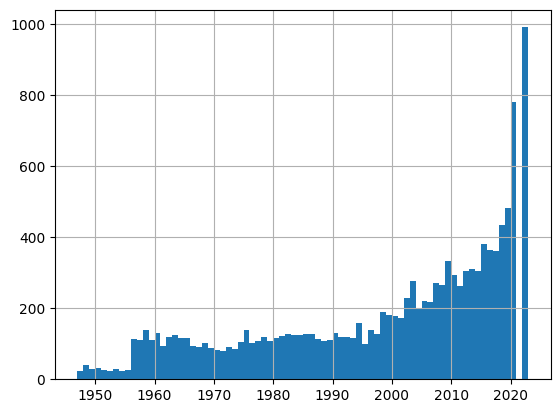

In [ ]:
# Histogram to see number of awards per year
print(f'{award} DB:')
year_count = df['year'].nunique()
print(f'Total years: {year_count}')
print(df['year'].hist(bins=year_count))

## EGOT

In [ ]:
# Set award
award = 'EGOT Winners'

df = egot_winners

# Begin Award DB stats
# # of rows with values by column
print(f'{award} DB:')
print(df.shape)

EGOT Winners DB:
(19, 9)


In [ ]:
print(f'{award} DB:')
egot_winners.info()

EGOT Winners DB:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19 non-null     object
 1   Emmy               19 non-null     int64 
 2   Grammy             19 non-null     int64 
 3   Oscar              19 non-null     int64 
 4   Tony               19 non-null     int64 
 5   EGOT completed     19 non-null     int64 
 6   Year span          19 non-null     int64 
 7   Age at completion  19 non-null     object
 8   Category(s)        19 non-null     object
dtypes: int64(6), object(3)
memory usage: 1.5+ KB


In [ ]:
# EGOT names
print(f'{award} DB:')
print(egot_winners['Name'].unique)

EGOT Winners DB:
<bound method Series.unique of 0         Richard Rodgers
1             Helen Hayes
2             Rita Moreno
3            John Gielgud
4          Audrey Hepburn
5         Marvin Hamlisch
6         Jonathan Tunick
7              Mel Brooks
8            Mike Nichols
9         Whoopi Goldberg
10            Scott Rudin
11           Robert Lopez
12    Andrew Lloyd Webber
13               Tim Rice
14            John Legend
15            Alan Menken
16        Jennifer Hudson
17            Viola Davis
18             Elton John
Name: Name, dtype: object>


# Awards - Detailed EDA

Only the Emmy and Oscar awards datasets contain null values. Let's further explore them.

## Emmy Awards

Five columns contain missing values: **title**, **nominee**, **role**, **company**, and **producer**.

In [ ]:
df = emmy_awards

null_columns = ['title', 'nominee', 'role', 'company', 'producer']


for col in null_columns:
  if df[col].dtype not in [np.int64, np.float64]:
    print('Unique Values for {}'.format(col))
    print(df[col].unique())
    print('')

missing = df[null_columns].copy()  # subset columns
# Redefine each column as a boolean indicating whether the original value was `?`
for col in missing.columns:
  missing[col] = missing[col].isna()
missing.sum()

Unique Values for title
['The Simpsons' 'Family Guy'
 'When You Wish Upon A Pickle: A Sesame Street Special' ...
 'Louis McManus For His Original Design of the Emmy'
 'KTLA for Outstanding overall achievement in 1948'
 'Charles Mesak/Don Lee TV for Phasefader - In Recog']

Unique Values for nominee
['Hank Azaria' 'Alex Borstein' 'Eric Jacobson' ... 'Rita LeRoy'
 'Patricia Morrison' 'Shirley Dinsdale']

Unique Values for role
['as Moe, Carl, Duffman, Kirk' 'as Lois Griffin, Tricia Takanawa'
 'as Bert, Grover, Oscar' ... 'as Mountain McClintlock' 'as Trainer'
 'as Cecil the Sea Serpent']

Unique Values for company
['FOX' 'HBO' 'Netflix' 'Showtime' 'BBC America' 'Prime Video' 'NBC'
 'truTV' 'CBS' 'ABC' 'FX Networks' 'Hulu' 'CNN' nan 'Pop TV' 'IFC'
 'Comedy Central' 'VH1' 'Discovery Channel' 'National Geographic' 'TBS'
 'Cinemax' 'BET Networks' 'CW' 'AMC' 'CBS (CBS All Access)' 'PBS'
 'Acorn TV' 'anemmyformegan.com' 'FunnyOrDie' 'YouTube' 'A&E' 'Lifetime'
 'Food Network' 'TLC' 'Bravo' 'You

title         156
nominee       702
role        24561
company       545
producer    31924
dtype: int64

In [ ]:
# Boolean mask identifying rows with missing values in all 5 columns
mask = df[null_columns].isnull().all(axis=1)

# Subset of the df where all 5 columns have missing values
records_with_all_missing = df[mask]

if not records_with_all_missing.empty:
    print("Records with missing values for all 5 attributes:")
    print(records_with_all_missing)
else:
    print("No records found with missing values for all 5 attributes.")

No records found with missing values for all 5 attributes.


In [ ]:
'''import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()'''

"import seaborn as sns\n\nplt.figure(figsize=(10, 6))\nsns.heatmap(df.isnull(), cmap='viridis', cbar=False)\nplt.title('Missing Values Heatmap')\nplt.show()"

In [ ]:
missing_patterns = df[null_columns].isnull().astype(int).groupby(null_columns).size().reset_index().rename(columns={0:'count'})
missing_patterns.sort_values(by='count', ascending=False, inplace=True)
print("Missing Value Patterns:")
print(missing_patterns)

Missing Value Patterns:
    title  nominee  role  company  producer  count
0       0        0     0        0         0  26662
5       0        0     1        0         1  20355
1       0        0     0        0         1  10234
4       0        0     1        0         0   3418
10      0        1     1        0         1    643
3       0        0     0        1         1    439
12      1        0     0        0         1    149
7       0        0     1        1         1     79
9       0        1     1        0         0     39
11      0        1     1        1         1     18
2       0        0     0        1         0      7
13      1        0     1        0         1      7
6       0        0     1        1         0      2
8       0        1     0        0         0      2


The **producer**, **role**, and **company** columns are not crucial so we won't focus on those attributes.
The most problematic column that is missing values is for the **nominee** attribute.

In [ ]:
null_nominee_records = df[df['nominee'].isnull()]

# Number of records with null nominee that won the award
null_nominee_wins = null_nominee_records[null_nominee_records['win'] == True].shape[0]

print("Number of records with null nominee that won the award:", null_nominee_wins)

Number of records with null nominee that won the award: 182


In [ ]:
attributes_to_check = ['year', 'category']

for attribute in attributes_to_check:
    missing_by_category = df[df['nominee'].isna()].groupby(attribute).size()
    print("Top 10 categories with the highest count of missing 'nominee' values by '{}':".format(attribute))
    top_10 = missing_by_category.nlargest(10)
    print(top_10)
    print("")

Top 10 categories with the highest count of missing 'nominee' values by 'year':
year
1956    68
1959    59
1955    57
1951    52
1962    47
1954    46
1963    45
1958    44
1964    41
1961    38
dtype: int64

Top 10 categories with the highest count of missing 'nominee' values by 'category':
category
Television Academy Honors                                  44
OUTSTANDING PROGRAM ACHIEVEMENT IN THE FIELD OF DRAMA      21
THE PROGRAM OF THE YEAR                                    19
BEST CHILDREN'S PROGRAM                                    18
BEST COMEDY SERIES                                         17
BEST SINGLE PROGRAM OF THE YEAR                            16
BEST LIVE CAMERA WORK                                      15
OUTSTANDING PROGRAM ACHIEVEMENT IN THE FIELD OF VARIETY    15
OUTSTANDING PROGRAM ACHIEVEMENT IN THE FIELD OF HUMOR      14
BEST PUBLIC SERVICE PROGRAM OR SERIES                      11
dtype: int64



In [ ]:
# Records with null nominee that won the award
null_nominee_wins_records = null_nominee_records[null_nominee_records['win'] == True]

# Group by 'category' and count missing 'nominee' values
top_missing_categories = null_nominee_wins_records.groupby('category')['nominee'].apply(lambda x: x.isnull().sum()).reset_index(name='missing_count')

# Sort by missing_count in descending order
top_missing_categories = top_missing_categories.sort_values(by='missing_count', ascending=False)

# Get the top 10 categories
top_10_missing_categories = top_missing_categories.head(10)

print("Top 10 categories with the highest count of missing 'nominee' values for records with null nominee that won the award:")
print(top_10_missing_categories)

Top 10 categories with the highest count of missing 'nominee' values for records with null nominee that won the award:
                                              category  missing_count
101                          Television Academy Honors             44
100                            THE PROGRAM OF THE YEAR              4
74   OUTSTANDING PROGRAM ACHIEVEMENT IN THE FIELD O...              4
2    BEST AUDIENCE PARTICIPATION, QUIZ OR PANEL PRO...              3
4                              BEST CHILDREN'S PROGRAM              3
50                     BEST SINGLE PROGRAM OF THE YEAR              3
7                                   BEST COMEDY SERIES              3
30                               BEST LIVE CAMERA WORK              3
78   OUTSTANDING PROGRAM ACHIEVEMENT IN THE FIELD O...              3
75   OUTSTANDING PROGRAM ACHIEVEMENT IN THE FIELD O...              3


Based on this [source](https://www.emmys.com/awards/honors#:~:text=The%20Television%20Academy%20Honors%20celebrates,Emmy's%20recognition%20of%20television%20excellence.), it seems normal that there is no nominee for the **Television Academy Honors**.

The list of the other awards above also suggest that they are not invidual awards but work awards. Therefore, explaining why the nominee values are null.

## Oscar Awards

Only the **film** column contains null values. Our first instinct is that they appear in records for personal and/or music awards.

In [ ]:
df = oscar_awards

if df['film'].dtype not in [np.int64, np.float64]:
  print('Unique Values for {}'.format('film'))
  print(df['film'].unique())
  print('')

missing = df[['film']].copy()  # subset columns
# Redefine each column as a boolean indicating whether the original value was `?`
for col in missing.columns:
  missing[col] = missing[col].isna()
missing.sum()

Unique Values for film
['The Noose' 'The Last Command' 'A Ship Comes In' ... 'Night Ride'
 'The Red Suitcase' 'Glass Onion: A Knives Out Mystery']



film    118
dtype: int64

In [ ]:
(missing['film'].sum()) / missing.shape[0]

0.011171068825144372

It seems that only 118 films are missing. This represents such a small portion.

In [ ]:
attributes_to_check = ['year', 'category', 'nominee', 'win']

for attribute in attributes_to_check:
    missing_by_category = df[df['film'].isna()].groupby(attribute).size()
    print("Top 6 categories with the highest count of missing 'film' values by '{}':".format(attribute))
    top_6 = missing_by_category.nlargest(6)
    print(top_6)
    print("")

Top 6 categories with the highest count of missing 'film' values by 'year':
year
1932    22
1938     7
1928     4
1931     4
1956     2
1961     2
dtype: int64

Top 6 categories with the highest count of missing 'film' values by 'category':
category
IRVING G. THALBERG MEMORIAL AWARD    45
JEAN HERSHOLT HUMANITARIAN AWARD     43
ASSISTANT DIRECTOR                   18
SOUND RECORDING                       8
ENGINEERING EFFECTS                   2
WRITING (Title Writing)               2
dtype: int64

Top 6 categories with the highest count of missing 'film' values by 'nominee':
nominee
Darryl F. Zanuck                               4
Samuel Goldwyn                                 3
David O. Selznick                              2
Hal B. Wallis                                  2
Metro-Goldwyn-Mayer Studio Sound Department    2
Paramount Publix Studio Sound Department       2
dtype: int64

Top 6 categories with the highest count of missing 'film' values by 'win':
win
True     92
False    2

75% of the missing film values come from these 2 awards, which is normal:
- The **IRVING G. THALBERG MEMORIAL AWARD** is an award that is preiodically awarded to "creative producers, whose bodies of work reflect a consistently high quality of motion picture production". The trophy itself is a bust of Thalberg rather than the familiar "Oscar" statuette. However, it is still counted as an "Honorary Oscar". Therefore, it is expected for this award to have no value for the film attribute.
- The **JEAN HERSHOLT HUMANITARIAN AWARD** award is awarded periodically by the Academy of Motion Picture Arts and Sciences at the Governors Awards ceremonies for an individual's "outstanding contributions to humanitarian causes". Therefore, it is expected for this award to have no value for the film attribute.

In [ ]:
# Filter the df to include only records where category is "ASSISTANT DIRECTOR"
filtered_df = df[df['category'] == 'ASSISTANT DIRECTOR']

# Group the missing "film" values by 'year'
missing_by_category = filtered_df[filtered_df['film'].isna()].groupby('year').size()

print("Missing 'film' values for records where category is 'ASSISTANT DIRECTOR' by 'year':")
print(missing_by_category)

Missing 'film' values for records where category is 'ASSISTANT DIRECTOR' by 'year':
year
1932    18
dtype: int64


For the **ASSISTANT DIRECTOR** award, it seems that the film is only missing for the year 1932. This is also expected based on this source **bold text**(even though the year seems to be off - should be 1933) https://en.wikipedia.org/wiki/Academy_Award_for_Best_Assistant_Director

In [ ]:
# Filter the df to include only records where category is "SOUND RECORDING"
filtered_df = df[df['category'] == 'SOUND RECORDING']

# Group the missing "film" values by 'year'
missing_by_category = filtered_df[filtered_df['film'].isna()].groupby('year').size()

print("Missing 'film' values for records where category is 'SOUND RECORDING' by 'year':")
print(missing_by_category)

Missing 'film' values for records where category is 'SOUND RECORDING' by 'year':
year
1931    4
1932    4
dtype: int64


For the **SOUND RECORDING** award, it seems that the film is only missing for the years 1931 & 1932. This is also expected based on this source https://en.wikipedia.org/wiki/Academy_Award_for_Best_Sound

In [ ]:
# Filter the df to include only records where category is "ENGINEERING EFFECTS"
filtered_df = df[df['category'] == 'ENGINEERING EFFECTS']

# Group the missing "film" values by 'year'
missing_by_category = filtered_df[filtered_df['film'].isna()].groupby('year').size()

print("Missing 'film' values for records where category is 'ENGINEERING EFFECTS' by 'year':")
print(missing_by_category)

Missing 'film' values for records where category is 'ENGINEERING EFFECTS' by 'year':
year
1928    2
dtype: int64


For the **ENGINEERING EFFECTS** award, it seems that the film is only missing for the year 1928. This is also expected based on this source https://en.wikipedia.org/wiki/Academy_Award_for_Best_Visual_Effects#:~:text=14%20References-,History%20of%20the%20award,War%20I%20flying%20drama%20Wings.

In [ ]:
# Filter the df to include only records where category is "WRITING (Title Writing)"
filtered_df = df[df['category'] == 'WRITING (Title Writing)']

# Group the missing "film" values by 'year'
missing_by_category = filtered_df[filtered_df['film'].isna()].groupby('year').size()

print("Missing 'film' values for records where category is 'WRITING (Title Writing)' by 'year':")
print(missing_by_category)

Missing 'film' values for records where category is 'WRITING (Title Writing)' by 'year':
year
1928    2
dtype: int64


For the **WRITING (Title Writing)** award, it seems that the film is only missing for the year 1928. This is also expected based on this source https://en.wikipedia.org/wiki/1st_Academy_Awards#:~:text=film%20%E2%80%93%20Nugent%20Slaughter-,Best%20Writing%20(Title%20Writing),-Joseph%20Farnham*%20%E2%80%93%20no

## Determining Primary Key

### Oscars

Determine how awards can be uniquely identified - let's try nominee, category, title.

In [ ]:
oscar_awards.dtypes

year         int64
category    object
nominee     object
win           bool
film        object
dtype: object

In [ ]:
df = oscar_awards
duplicate_entries = df[df.duplicated(subset=['nominee', 'category', 'film'], keep=False)]
duplicate_entries.size

165

165 duplicates in Oscars. Lets consider the reasons for them - let take a look at them.

In [ ]:
duplicate_entries.head()

,year,category,nominee,win,film
144,1931,SOUND RECORDING,Metro-Goldwyn-Mayer Studio Sound Department,False,NaN
145,1931,SOUND RECORDING,Paramount Publix Studio Sound Department,True,NaN
146,1931,SOUND RECORDING,RKO Radio Studio Sound Department,False,NaN
190,1932,SOUND RECORDING,Metro-Goldwyn-Mayer Studio Sound Department,False,NaN
191,1932,SOUND RECORDING,Paramount Publix Studio Sound Department,True,NaN


In [ ]:
category = 'SOUND RECORDING'
nominee = 'Metro-Goldwyn-Mayer Studio Sound Department'

specific_entry = df[(df['category'] == category) & (df['nominee'] == nominee) & (df['film'].isnull())]
specific_entry.head()


,year,category,nominee,win,film
144,1931,SOUND RECORDING,Metro-Goldwyn-Mayer Studio Sound Department,False,NaN
190,1932,SOUND RECORDING,Metro-Goldwyn-Mayer Studio Sound Department,False,NaN


There are duplicate here since film is null, and therefore we need year to uniquely identify it.

Lets see if adding year completely solves the issue.

In [ ]:
duplicate_entries = df[df.duplicated(subset=['nominee', 'category', 'film','year'], keep=False)]
duplicate_entries.size

85

We still have 85 left - let's look at them.

In [ ]:
duplicate_entries.head(10)

,year,category,nominee,win,film
6094,1983,MUSIC (Original Song),Music by Michel Legrand; Lyric by Alan Bergman...,False,Yentl
6095,1983,MUSIC (Original Song),Music by Michel Legrand; Lyric by Alan Bergman...,False,Yentl
6719,1989,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,False,The Little Mermaid
6720,1989,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,True,The Little Mermaid
6929,1991,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,False,Beauty and the Beast
6930,1991,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,True,Beauty and the Beast
6931,1991,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,False,Beauty and the Beast
7253,1994,MUSIC (Original Song),Music by Elton John; Lyric by Tim Rice,True,The Lion King
7254,1994,MUSIC (Original Song),Music by Elton John; Lyric by Tim Rice,False,The Lion King
7255,1994,MUSIC (Original Song),Music by Elton John; Lyric by Tim Rice,False,The Lion King


We can see that there any many duplicate records, as well as almost duplicate records with a different year. When looking at the oscars database website, its clear that the reason for this is that there can be multiple songs for a single film. Ex. Little Mermaid has Under the Sea and Kiss the Girl, the former which Alan Mehken won and the latter he lost on.


Lets check out it this is an issue only for music awards in the Oscars database.

In [ ]:
duplicate_entries_without_music=duplicate_entries[~duplicate_entries['category'].str.contains('MUSIC')]
duplicate_entries_without_music.size

0

Yep - they are all music

### Emmys

In [ ]:
df=emmy_awards.dropna().drop_duplicates()
duplicate_entries = df[df.duplicated(subset=['nominee', 'category', 'title','year','role', 'company', 'producer'], keep=False)]
duplicate_entries.size

1746

In [ ]:
duplicate_entries.head(20)

,origin_id,year,category,title,nominee,role,company,producer,win
970,340,2019,"Outstanding Writing For A Limited Series, Movi...",Escape At Dannemora,Brett Johnson,Written by,Showtime,"Red Hour, Busyhands, The White Mountain Compan...",False
971,340,2019,"Outstanding Writing For A Limited Series, Movi...",Escape At Dannemora,Michael Tolkin,Written by,Showtime,"Red Hour, Busyhands, The White Mountain Compan...",False
973,341,2019,"Outstanding Writing For A Limited Series, Movi...",Escape At Dannemora,Brett Johnson,Written by,Showtime,"Red Hour, Busyhands, The White Mountain Compan...",False
974,341,2019,"Outstanding Writing For A Limited Series, Movi...",Escape At Dannemora,Michael Tolkin,Written by,Showtime,"Red Hour, Busyhands, The White Mountain Compan...",False
2844,696,2018,Outstanding Production Design For A Narrative ...,The Handmaid's Tale,Elisabeth Williams,Production Designer,Hulu,"MGM, Hulu, The Littlefield Company, White Oak ...",True
2845,696,2018,Outstanding Production Design For A Narrative ...,The Handmaid's Tale,Martha Sparrow,Art Director,Hulu,"MGM, Hulu, The Littlefield Company, White Oak ...",True
2847,697,2018,Outstanding Production Design For A Narrative ...,The Handmaid's Tale,Elisabeth Williams,Production Designer,Hulu,"MGM, Hulu, The Littlefield Company, White Oak ...",False
2848,697,2018,Outstanding Production Design For A Narrative ...,The Handmaid's Tale,Martha Sparrow,Art Director,Hulu,"MGM, Hulu, The Littlefield Company, White Oak ...",False
5474,1362,2017,Outstanding Production Design for a Narrative ...,Westworld,Julie Ochipinti,Set Decorator,HBO,HBO Entertainment in association with Kilter F...,False
5477,1363,2017,Outstanding Production Design for a Narrative ...,Westworld,Julie Ochipinti,Set Decorator,HBO,HBO Entertainment in association with Kilter F...,False


You can see here that Emmy's contains data with the same id, name, year, title, category, but with a different win status. An example is the The Handsmaid Tale which have the same entry of Elisabeth Williams with varying True/False values. A look at the Emmy's dataset for this show makes it clear that there are many episodes for this show; she lost on "Seeds" and won on "June".

There are 36 exact duplicates in database

### Tony

In [ ]:
df=tony_awards
duplicate_entries = df[df.duplicated(keep=False)]
duplicate_entries.size

7248

In [ ]:
df=tony_awards
duplicate_entries = df[df.duplicated(keep=False)]
duplicate_entries.head(10)

,year,category,nominee,win,performance,nominee_id
61,2023,Best Play,James Ijames,Nominee,Fat Ham,james-ijames-534683
83,2023,Best Play,James Ijames,Nominee,Fat Ham,james-ijames-534683
212,2023,Best Original Score Written for the Theatre,Tom Kitt,Nominee,Almost Famous,tom-kitt-100673
213,2023,Best Original Score Written for the Theatre,Tom Kitt,Nominee,Almost Famous,tom-kitt-100673
214,2023,Best Original Score Written for the Theatre,Helen Park,Nominee,KPOP,helen-park-518545
215,2023,Best Original Score Written for the Theatre,Helen Park,Nominee,KPOP,helen-park-518545
216,2023,Best Original Score Written for the Theatre,Max Vernon,Nominee,KPOP,max-vernon-518546
217,2023,Best Original Score Written for the Theatre,Max Vernon,Nominee,KPOP,max-vernon-518546
218,2023,Best Original Score Written for the Theatre,Brandy Clark,Nominee,Shucked,brandy-clark-535832
219,2023,Best Original Score Written for the Theatre,Brandy Clark,Nominee,Shucked,brandy-clark-535832


By looking at Tom Kitt on the ibdb site, its clear that there can be duplicates in our DB since one person can have multiple roles in a performance (Tom Kitt was both a lyricist and composer) - let's get rid of complete duplicates.

In [ ]:
no_dup_df= df.drop_duplicates()
no_dup_df.head()

,year,category,nominee,win,performance,nominee_id
0,2023,Best Play,Sonia Friedman Productions,Winner,Leopoldstadt,sonia-friedman-productions-108722
1,2023,Best Play,Roy Furman,Winner,Leopoldstadt,roy-furman-91627
2,2023,Best Play,Lorne Michaels,Winner,Leopoldstadt,lorne-michaels-7374
3,2023,Best Play,Stephanie P. McClelland,Winner,Leopoldstadt,stephanie-p-mcclelland-478527
4,2023,Best Play,Gavin Kalin,Winner,Leopoldstadt,gavin-kalin-527235


In [ ]:
df=tony_awards.dropna().drop_duplicates()
duplicate_entries = df[df.duplicated(subset=['nominee', 'category', 'performance','year'], keep=False)]
duplicate_entries.size

0

Thats good - that means we can keep winner out of the PK.

### Grammys

I think there is a difference between our two scraped Grammy datasets - lets check this out.

In [ ]:
# grammy_awards_imdb is not defined --> that's why we get an error here

# df=grammy_awards_imdb.dropna().drop_duplicates()
# duplicate_entries = df[df.duplicated(subset=['nominee', 'category', 'title','year'], keep=False)]
# duplicate_entries.head(10)

Here we see Aladdin for example, with the same two records with the difference of true and false, with the other difference between the role, since they are for different songs - "Whole new world"(Win) and "Friend Like Me".

Lets check out original grammys dataset

In [ ]:
'''
df=grammy_awards.dropna().drop_duplicates()
duplicate_entries = df[df.duplicated(subset=['nominee', 'award', 'title','year'], keep=False)]
duplicate_entries.head(10)'''

"\ndf=grammy_awards.dropna().drop_duplicates()\nduplicate_entries = df[df.duplicated(subset=['nominee', 'award', 'title','year'], keep=False)]\nduplicate_entries.head(10)"

Confirmed - lets keep this old dataset. For Grammy's we are interested in songs not the movies. This way, we will keep winner out of the PK.

### Generic

In [ ]:
'''common_categories = set()

for _, df in imdb_award_dataframes:
    categories = set(df['category'])

    if not common_categories:
        common_categories.update(categories)
    else:
        common_categories.intersection_update(categories)

print("Common categories among all dataframes:")
print(common_categories)
'''

'common_categories = set()\n\nfor _, df in imdb_award_dataframes:\n    categories = set(df[\'category\'])\n\n    if not common_categories:\n        common_categories.update(categories)\n    else:\n        common_categories.intersection_update(categories)\n\nprint("Common categories among all dataframes:")\nprint(common_categories)\n'

# EGOT Winners

## Observing Missing EGOT Winners

Here we look at the winners in our EGOT dataset and check that that they appear in each of the award datasets as winners.

In [ ]:
# Get a list of the EGOT Winners from our EGOT dataset
egots = egot_winners['Name'].tolist()

# Iterate over each dataset to check that the EGOT winner appears
# Purpose of this to spot issues that need to be resolved in the dataset
# Example: the first EGOT winner Richard Rodgers is not found in Oscars dataset
# since it's indicated as:
# Music by Richard Rodgers; Lyrics by Oscar Hammerstein II

for egot_winner in egots:
  egot_emmys = emmy_awards.loc[(emmy_awards['nominee'] == egot_winner) & (emmy_awards['win'] == True)]
  egot_grammys = grammy_awards.loc[(grammy_awards['nominee'] == egot_winner) & (grammy_awards['win'] == True)]
  egot_oscars = oscar_awards.loc[(oscar_awards['nominee'] == egot_winner) & (oscar_awards['win'] == True)]
  egot_tonys = tony_awards.loc[(tony_awards['nominee'] == egot_winner) & (tony_awards['win'] == 'Winner')]

  print('----------------EGOT WINNER------------------')
  print(egot_winner)
  if egot_emmys.empty:
    print('EGOT NOT FOUND IN EMMY DATASET! NEED TO INVESTIGATE!')
  if egot_grammys.empty:
    print('EGOT NOT FOUND IN GRAMMY DATASET! NEED TO INVESTIGATE!')
  if egot_oscars.empty:
    print('EGOT NOT FOUND IN OSCAR DATASET! NEED TO INVESTIGATE!')
  if egot_tonys.empty:
    print('EGOT NOT FOUND IN TONY DATASET! NEED TO INVESTIGATE!')

  print('-------------------EMMY----------------------')
  print(egot_emmys)
  print('------------------GRAMMY---------------------')
  print(egot_grammys)
  print('------------------OSCAR----------------------')
  print(egot_oscars)
  print('-------------------TONY----------------------')
  print(egot_tonys)
  print('\n\n')

----------------EGOT WINNER------------------
Richard Rodgers
EGOT NOT FOUND IN OSCAR DATASET! NEED TO INVESTIGATE!
-------------------EMMY----------------------
       origin_id  year                                           category  \
60561      20157  1962  Outstanding Achievement in Original Music Comp...   

                                     title          nominee role company  \
60561  Winston Churchill-The Valient Years  Richard Rodgers  NaN     ABC   

      producer   win  
60561      NaN  True  
------------------GRAMMY---------------------
       year                         category               title  \
187    1960  Best Show Album (Original Cast)  The Sound Of Music   
17907  1962    Best Original Cast Show Album          No Strings   

               nominee   win  
187    Richard Rodgers  True  
17907  Richard Rodgers  True  
------------------OSCAR----------------------
Empty DataFrame
Columns: [year, category, nominee, win, film]
Index: []
-------------------TON

Here, we summarize the informaiton to easily view the missing EGOT is missing from which dataset.

In [ ]:
missing_egots = pd.DataFrame(columns=['Name', 'Emmy', 'Grammy', 'Oscar', 'Tony'])

for egot_winner in egots:
    egot_emmys = bool(len(emmy_awards.loc[(emmy_awards['nominee'] == egot_winner) & (emmy_awards['win'] == True)]) > 0)
    egot_grammys = bool(len(grammy_awards.loc[(grammy_awards['nominee'] == egot_winner) & (grammy_awards['win'] == True)]) > 0)
    egot_oscars = bool(len(oscar_awards.loc[(oscar_awards['nominee'] == egot_winner) & (oscar_awards['win'] == True)]) > 0)
    egot_tonys = bool(len(tony_awards.loc[(tony_awards['nominee'] == egot_winner) & (tony_awards['win'] == 'Winner')]) > 0)

    if not (egot_emmys and egot_grammys and egot_oscars and egot_tonys):
        missing_egots = pd.concat([missing_egots, pd.DataFrame({'Name': [egot_winner],
                                                               'Emmy': [egot_emmys],
                                                               'Grammy': [egot_grammys],
                                                               'Oscar': [egot_oscars],
                                                               'Tony': [egot_tonys]})],
                                  ignore_index=True)

print(missing_egots)

                   Name   Emmy Grammy  Oscar   Tony
0       Richard Rodgers   True   True  False   True
1       Jonathan Tunick   True   True  False   True
2       Whoopi Goldberg  False   True   True   True
3           Scott Rudin   True   True  False   True
4          Robert Lopez  False   True  False   True
5   Andrew Lloyd Webber   True   True  False   True
6              Tim Rice   True   True  False   True
7           John Legend   True   True  False  False
8           Alan Menken  False   True   True   True
9       Jennifer Hudson  False   True   True   True
10           Elton John  False   True  False   True


## Examining Missing EGOT Winners

Records in Oscars with Nominees with longer descriptions

In [ ]:
oscars_contains_richard_rodgers = oscar_awards['nominee']==('Richard Rodgers')

records_with_richard_rodgers = oscar_awards[oscars_contains_richard_rodgers]
display(records_with_richard_rodgers)

,year,category,nominee,win,film


Nothing shows when we look for exact name.

In [ ]:
oscars_contains_richard_rodgers = oscar_awards['nominee'].str.contains('Richard Rodgers')

records_with_richard_rodgers = oscar_awards[oscars_contains_richard_rodgers]
display(records_with_richard_rodgers)

,year,category,nominee,win,film
1866,1945,MUSIC (Song),Music by Richard Rodgers; Lyrics by Oscar Hamm...,True,State Fair


But shows when we use contains. Lets run the "sum up" code above to see how many the missing EGOT winners this accounts for.

In [ ]:
missing_egots = pd.DataFrame(columns=['Name', 'Emmy', 'Grammy', 'Oscar', 'Tony'])

for egot_winner in egots:
    egot_emmys = bool(len(emmy_awards.loc[(emmy_awards['nominee'].str.contains(egot_winner)) & (emmy_awards['win'] == True)]) > 0)
    egot_grammys = bool(len(grammy_awards.loc[(grammy_awards['nominee'].str.contains(egot_winner)) & (grammy_awards['win'] == True)]) > 0)
    egot_oscars = bool(len(oscar_awards.loc[(oscar_awards['nominee'].str.contains(egot_winner)) & (oscar_awards['win'] == True)]) > 0)
    egot_tonys = bool(len(tony_awards.loc[(tony_awards['nominee'].str.contains(egot_winner)) & (tony_awards['win'] == 'Winner')]) > 0)

    if not (egot_emmys and egot_grammys and egot_oscars and egot_tonys):
        missing_egots = pd.concat([missing_egots, pd.DataFrame({'Name': [egot_winner],
                                                               'Emmy': [egot_emmys],
                                                               'Grammy': [egot_grammys],
                                                               'Oscar': [egot_oscars],
                                                               'Tony': [egot_tonys]})],
                                  ignore_index=True)

print(missing_egots)

              Name   Emmy Grammy  Oscar  Tony
0  Whoopi Goldberg  False   True   True  True
1     Robert Lopez  False   True   True  True
2      John Legend   True   True  False  True
3      Alan Menken  False   True   True  True
4  Jennifer Hudson  False   True   True  True
5       Elton John  False   True   True  True


We can see that it accounts for 5 of them.

Note that there are some that do not have additional words, but only have extra white space. Here's an example-

In [ ]:
grammy_exact_viola_davis = grammy_awards['nominee']==('Viola Davis')

records_with_viola_davis = grammy_awards[grammy_exact_viola_davis]
display(records_with_viola_davis)

,year,category,title,nominee,win
4395,2022,"Best Audio Book, Narration, and Storytelling R...",Finding Me,Viola Davis,True


Nothing shows when looking for exact name, but shows when stripping white space.

In [ ]:
grammy_strip_white_viola_davis = grammy_awards['nominee'].str.contains(r'\bViola Davis\b')

records_with_viola_davis = grammy_awards[grammy_strip_white_viola_davis]
display(records_with_viola_davis)

,year,category,title,nominee,win
4395,2022,"Best Audio Book, Narration, and Storytelling R...",Finding Me,Viola Davis,True


Lets look at some name discrepencies

In [ ]:
result= oscar_awards[(oscar_awards['nominee'].str.contains('John Stephens'))]
display(result)

,year,category,nominee,win,film
9537,2014,MUSIC (Original Song),Music and Lyric by John Stephens and Lonnie Lynn,True,Selma


John Stephens is another name for John Legend, which explains why John Legend does not show up in Oscars - [see wiki page](https://en.wikipedia.org/wiki/John_Legend#:~:text=John%20Roger%20Stephens%20(born%20December,%2C%20record%20producer%2C%20and%20actor)

---



In [ ]:
result= tony_awards[(tony_awards['nominee'].str.contains('John Legend'))]
display(result)

,year,category,nominee,win,performance,nominee_id
2373,2018,Best Original Score Written for the Theatre,John Legend,Nominee,SpongeBob SquarePants,john-legend-511254
2892,2017,Best Revival of a Play,John Legend/Mike Jackson,Winner,Jitney,john-legend-mike-jackson-511311


In [ ]:
display(egot_winners[egot_winners['Name']=='John Legend'])

,Name,Emmy,Grammy,Oscar,Tony,EGOT completed,Year span,Age at completion,Category(s)
14,John Legend,2018,2006,2015,2017,2018,12,"39 years, 8 months","Singer, composer, producer"


Still seems not clear why he doesn't come up as having won the Tony's in 2017 (and only comes up as having been nominated in 2018) - this must have a different reason.

In [ ]:
tony_awards_recent= tony_awards[(tony_awards['year']==2017) & (tony_awards['win']=='Winner')]
display(tony_awards_recent)

,year,category,nominee,win,performance,nominee_id
2684,2017,Best Play,J. T. Rogers,Winner,Oslo,j-t-rogers-509323
2685,2017,Best Play,Lincoln Center Theater (André Bishop: Producin...,Winner,Oslo,lincoln-center-theater-andr-bishop-producing-a...
2748,2017,Best Musical,Stacey Mindich,Winner,Dear Evan Hansen,stacey-mindich-478408
2749,2017,Best Musical,Mickey Liddell,Winner,Dear Evan Hansen,mickey-liddell-503580
2750,2017,Best Musical,Hunter Arnold,Winner,Dear Evan Hansen,hunter-arnold-490661
...,...,...,...,...,...,...
3016,2017,Best Direction of a Play,Rebecca Taichman,Winner,Indecent,rebecca-taichman-511165
3021,2017,Best Direction of a Musical,Christopher Ashley,Winner,Come From Away,christopher-ashley-14067
3026,2017,Best Choreography,Andy Blankenbuehler,Winner,Bandstand,andy-blankenbuehler-32280
3032,2017,Best Orchestrations,Alex Lacamoire,Winner,Dear Evan Hansen,alex-lacamoire-112595


The award he won in 2017 was Jitney, and he was a co-producer - see bottom of [ibdb page on Jitney](https://www.ibdb.com/broadway-production/jitney-507859) - he's not shown because the nominee column only shows the name of the show, but not all the producers - we may need to scrape them as well.

Let's look take a look at the missing Emmy awards - a few of them have to do with a discrepency in the span of years of various datasets - let's run the sum up code above with additional code that will check for that.

In [ ]:
# Create an empty DataFrame to store missing EGOT winners
missing_egots = pd.DataFrame(columns=['Name', 'Emmy', 'Grammy', 'Oscar', 'Tony', 'Emmy_Win_Years'])

for egot_winner in egots:
    # Check if the winner won an Emmy
    egot_emmys = bool(len(emmy_awards.loc[(emmy_awards['nominee'] == egot_winner) & (emmy_awards['win'] == True)]) > 0)

    # If the winner did not win an Emmy, proceed to check other awards
    if not egot_emmys:
        # Find the years in which the winner won Emmy awards
        win_years = egot_winners.loc[egot_winners['Name'] == egot_winner, 'Emmy'].unique()

        # Add the missing EGOT winner to the DataFrame
        missing_egots = pd.concat([missing_egots, pd.DataFrame({'Name': [egot_winner],
                                                               'Emmy': [egot_emmys],
                                                               'Grammy': [egot_grammys],
                                                               'Oscar': [egot_oscars],
                                                               'Tony': [egot_tonys],
                                                               'Emmy_Win_Years': [win_years.tolist()]})],
                                  ignore_index=True)

print(missing_egots)


              Name   Emmy Grammy Oscar  Tony Emmy_Win_Years
0  Whoopi Goldberg  False   True  True  True         [2002]
1     Robert Lopez  False   True  True  True         [2008]
2      Alan Menken  False   True  True  True         [2020]
3  Jennifer Hudson  False   True  True  True         [2021]
4       Elton John  False   True  True  True         [2024]


We can see that the latter three won in a year after 2019, while the Emmy's dataset goes up to 2019.

In [ ]:
emmy_awards.describe()

,origin_id,year
count,62054.000000,62054.000000
mean,9027.907919,2000.548732
std,5699.831090,15.138144
min,1.000000,1949.000000
25%,4160.000000,1992.000000
50%,8592.500000,2004.000000
75%,13415.000000,2013.000000
max,21503.000000,2019.000000


We still need to figure out Robert Lopez and Whoopi Goldberg

In [ ]:
# Check for non-missing values in the 'nominee' column
not_missing_nominee = emmy_awards['nominee'].notna()


In [ ]:
# Filter the DataFrame based on the condition and non-missing values
emmy_awards_contains_lopez = emmy_awards.loc[not_missing_nominee, 'nominee'].str.contains('Lopez')
records_with_lopez = emmy_awards.loc[not_missing_nominee & emmy_awards_contains_lopez]

records_with_lopez.describe()
# Display the resulting DataFrame
display(records_with_lopez)

,origin_id,year,category,title,nominee,role,company,producer,win
5913,1552,2017,Outstanding Creative Achievement in Interactiv...,The Man In The High Castle: Resistance Radio,Brianna Lopez,Head of Industry and Consumer Brand,Amazon,Amazon Studios,False
6818,1805,2017,Outstanding Documentary or Nonfiction Special,L.A. Burning: The Riots 25 Years Later,Kevin Lopez,Executive Producer,A&E,"Entertainment One Reality Productions, Inc. an...",False
11480,2866,2015,Outstanding Original Music And Lyrics,The Oscars,Kristen Anderson-Lopez,Music & Lyrics by,ABC,The Academy of Motion Picture Arts and Sciences,False
11481,2866,2015,Outstanding Original Music And Lyrics,The Oscars,Robert Lopez,Music & Lyrics by,ABC,The Academy of Motion Picture Arts and Sciences,False
11482,2867,2015,Outstanding Original Music And Lyrics,The Comedians,Kristen Anderson-Lopez,Lyrics by,FX Networks,Fox 21 Television Studios and FX Productions,False
11483,2867,2015,Outstanding Original Music And Lyrics,The Comedians,Robert Lopez,Music by,FX Networks,Fox 21 Television Studios and FX Productions,False
14302,3713,2014,Outstanding Special And Visual Effects In A Su...,Hawaii Five-0,Dan Lopez,3D Lead Artist,CBS,NaN,False
15050,3998,2013,Outstanding Cinematography For Nonfiction Prog...,The Men Who Built America,Richard V. Lopez,NaN,HISTORY,Stephen David Entertainment for History,False
25912,7234,2007,Outstanding Original Music And Lyrics,Scrubs,Robert Lopez,Lyrics by,NBC,ABC Studios,False
26417,7333,2007,Outstanding Special Visual Effects For A Minis...,Nightmares & Dreamscapes: From The Stories Of ...,Adalberto Lopez,CGI Supervisor,TNT,Ostar Productions,True


No winning results for Lopez - lets look at Whoopi Goldberg

In [ ]:
emmy_awards_contains_goldberg = emmy_awards.loc[not_missing_nominee, 'nominee'].str.contains('Whoopi Goldberg')
records_with_goldberg = emmy_awards.loc[not_missing_nominee & emmy_awards_contains_goldberg]

display(records_with_goldberg)

,origin_id,year,category,title,nominee,role,company,producer,win
13097,3455,2014,Outstanding Documentary Or Nonfiction Special,Whoopi Goldberg Presents Moms Mabley,Whoopi Goldberg,Executive Producer / Produced by,HBO,NaN,False
14234,3705,2014,Outstanding Narrator,Whoopi Goldberg Presents Moms Mabley,Whoopi Goldberg,as Narrator,HBO,NaN,False


Also here no winning results show. For Whoopi, it says on her wiki page that she her birth name is Caryn Elaine Johnson - lets try that.

In [ ]:
# Filter the DataFrame based on the condition and non-missing values
emmy_awards_contains_johnson = emmy_awards.loc[not_missing_nominee, 'nominee'].str.contains('Caryn Elaine Johnson')
records_with_johnson = emmy_awards.loc[not_missing_nominee & emmy_awards_contains_johnson]

display(records_with_johnson)

,origin_id,year,category,title,nominee,role,company,producer,win


Nothing comes up (which also makes sense, since this DB does have her as Whoopi Goldberg since she came up elseswhere in the DB for being nominated).

On Wiki it says Whoopi won the Emmy's in 2009 with the award called Outstanding Talk Show Host - lets look that up.

In [ ]:
# Filter the DataFrame based on the condition and non-missing values
emmy_awards_contains_talk_show = emmy_awards[(emmy_awards['year']==2009) & (emmy_awards['category'].str.contains('Host'))]

display(emmy_awards_contains_talk_show)

,origin_id,year,category,title,nominee,role,company,producer,win
21843,6027,2009,Outstanding Host For A Reality Or Reality-Comp...,Project Runway,Heidi Klum,as Host,Bravo,"The Weinstein Company, Miramax Films, Bunim-Mu...",False
21844,6028,2009,Outstanding Host For A Reality Or Reality-Comp...,Top Chef,Padma Lakshmi,as,Bravo,Magical Elves,False
21845,6029,2009,Outstanding Host For A Reality Or Reality-Comp...,The Amazing Race,Phil Keoghan,as,CBS,World Race Productions Inc.,False
21846,6030,2009,Outstanding Host For A Reality Or Reality-Comp...,Survivor,Jeff Probst,as,CBS,Mark Burnett Productions,True
21847,6031,2009,Outstanding Host For A Reality Or Reality-Comp...,Dancing With The Stars,Tom Bergeron,as,ABC,BBC Worldwide Productions,False
21848,6032,2009,Outstanding Host For A Reality Or Reality-Comp...,American Idol,Ryan Seacrest,as,FOX,"FremantleMedia North America, Inc. and 19 TV Ltd.",False


Nothing comes up for her - interestingly nothing even comes up for Talk Show Host at all.
She starred in a show called "The View" - lets look that up.

In [ ]:
# Drop rows with missing values in the 'title' column
emmy_awards_cleaned = emmy_awards.dropna(subset=['title'])

emmy_awards_contains_the_view = emmy_awards_cleaned[emmy_awards_cleaned['title'].str.contains('View')]
display(emmy_awards_contains_the_view)

,origin_id,year,category,title,nominee,role,company,producer,win
97,52,2019,Outstanding Commercial,Point Of View - Sandy Hook Promise,BBDO New York,Ad Agency,NaN,NaN,False
98,52,2019,Outstanding Commercial,Point Of View - Sandy Hook Promise,MJZ,Production Company,NaN,NaN,False


Nothing comes up.

Let us consider the fact that it's clear on our scraped EGOT wiki page that both Robert Lopez and Whoopi Goldberg (together with Jennifer Hudson and Alan Menken, whose absense from the Emmy's was previously attributed to being after 2019) all did not win Primetime Emmy's awards but rather Daytime awards. Let's make sure out Emmy's dataset also contains Daytime Awards.

In [ ]:
result= emmy_awards[(emmy_awards['category'].str.contains('Talk Show'))]
result.shape

(0, 9)

Seems like there are zero awards here for Outstanding Talk Show Host. It's very possible that such an award only exists for Daytime Emmy's - let's take a look at Robert Lopez's Outstanding Original Song Award

In [ ]:
result= emmy_awards[emmy_awards['category'].str.contains('Outstanding Original')]
unique_result= result['category'].unique()
print(unique_result)

['Outstanding Original Interactive Program'
 'Outstanding Original Music And Lyrics'
 'Outstanding Original Main Title Theme Music'
 'Outstanding Original Music and Lyrics']


Nothing shows - need to look more into this - UPDATE- CONFIRMED THAT OUR DB DOES NOT CONTAIN DAYTIME

Lets go back and look at Whoopi- even if we discount the DayTime awards, she still comes us far less than expected.

In [ ]:
emmy_awards_contains_goldberg = emmy_awards.loc[not_missing_nominee, 'nominee'].str.contains('Whoopi Goldberg')
records_with_goldberg = emmy_awards.loc[not_missing_nominee & emmy_awards_contains_goldberg]

display(records_with_goldberg)

,origin_id,year,category,title,nominee,role,company,producer,win
13097,3455,2014,Outstanding Documentary Or Nonfiction Special,Whoopi Goldberg Presents Moms Mabley,Whoopi Goldberg,Executive Producer / Produced by,HBO,NaN,False
14234,3705,2014,Outstanding Narrator,Whoopi Goldberg Presents Moms Mabley,Whoopi Goldberg,as Narrator,HBO,NaN,False


Its clear from Emmys.com and wiki that she was nominated (not won) for many more Emmy's awards, such as in 2005, 1996 etc.

I noticed when searching her name on the TSV file that her name is often written in capital letters - lets see if that's the issue.

In [ ]:
emmy_awards_contains_goldberg = emmy_awards.loc[not_missing_nominee, 'nominee'].str.contains('Whoopi Goldberg',case=False)
records_with_goldberg = emmy_awards.loc[not_missing_nominee & emmy_awards_contains_goldberg]

display(records_with_goldberg)

,origin_id,year,category,title,nominee,role,company,producer,win
13097,3455,2014,Outstanding Documentary Or Nonfiction Special,Whoopi Goldberg Presents Moms Mabley,Whoopi Goldberg,Executive Producer / Produced by,HBO,NaN,False
14234,3705,2014,Outstanding Narrator,Whoopi Goldberg Presents Moms Mabley,Whoopi Goldberg,as Narrator,HBO,NaN,False
23005,6364,2009,Outstanding Special Class Programs,The 62nd Annual Tony Awards,WHOOPI GOLDBERG,Host,CBS,White Cherry Entertainment in association with...,False
29094,8107,2005,Outstanding Individual Performance In A Variet...,Whoopi Back To Broadway - The 20th Anniversary,WHOOPI GOLDBERG,Performer,HBO,NaN,False
42369,11932,1996,OUTSTANDING PERFORMANCE FOR A VARIETY OR MUSIC...,The 68th Annual Academy Awards,WHOOPI GOLDBERG,as,ABC,NaN,False
44911,12748,1994,Outstanding Individual Performance In A Variet...,The 66th Annual Academy Awards,WHOOPI GOLDBERG,NaN,ABC,NaN,False
47078,13585,1991,Outstanding Guest Actress In A Comedy Series,A Different World,WHOOPI GOLDBERG,as Professor Jordan,NBC,NaN,False
50956,15190,1986,OUTSTANDING GUEST PERFORMER IN A DRAMA SERIES,Moonlighting,WHOOPI GOLDBERG,as,ABC,NaN,False


Yes - that's the issue.

# EDA On IMDB Data

## Import Data and Basic EDA

Import Data

In [ ]:
# EGOT Award Datasets

# Emmy's Primetime
emmy_primetime_awards_imdb = pd.read_table(file_path + '/emmys/emmy_award_primetime/emmys_primetime_award_history_imdb.tsv')

# Emmy's Daytime
emmy_daytime_awards_imdb = pd.read_table(file_path + '/emmys/emmy_award_daytime/emmys_daytime_award_history_imdb.tsv')

# Grammy's
grammy_awards_imdb = pd.read_table(file_path + '/grammys/grammys_award_history_imdb.tsv')

# Oscar's
oscar_awards_imdb = pd.read_table(file_path + '/oscars/oscars_award_history_imdb.tsv')

# Tony's
tony_awards = pd.read_table(file_path + '/tonys/tony_award_history.tsv')

print('Datasets loaded into DataFrames')

Datasets loaded into DataFrames


In [ ]:
emmy_primetime_awards_imdb

,year,category,nominee,title,winner,imdb_id,imdb_img,episode
0,1949,Most Outstanding Television Personality,Shirley Dinsdale,... and her puppet Judy Splinters.,True,nm1589018,https://m.media-amazon.com/images/M/MV5BMTY2MD...,NaN
1,1949,Most Outstanding Television Personality,Bill Welsh,NaN,False,nm0920521,https://m.media-amazon.com/images/M/MV5BYzlkYm...,NaN
2,1949,Most Outstanding Television Personality,Mike Stokey,NaN,False,nm0831410,https://m.media-amazon.com/images/M/MV5BODM1NT...,NaN
3,1949,Most Outstanding Television Personality,Patricia Morison,NaN,False,nm0605685,https://m.media-amazon.com/images/M/MV5BZmFhMj...,NaN
4,1949,Most Outstanding Television Personality,Rita La Roy,NaN,False,nm0478996,https://m.media-amazon.com/images/M/MV5BN2ZjY2...,NaN
...,...,...,...,...,...,...,...,...
73052,2023,Outstanding Writing for a Variety Series,Tom Purcell,The Late Show with Stephen Colbert,False,nm0700770,NaN,NaN
73053,2023,Outstanding Writing for a Variety Series,Kate Sidley,The Late Show with Stephen Colbert,False,nm5900777,https://m.media-amazon.com/images/M/MV5BMGI1Mz...,NaN
73054,2023,Outstanding Writing for a Variety Series,Brian Stack,The Late Show with Stephen Colbert,False,nm0821026,https://m.media-amazon.com/images/M/MV5BNTg1OG...,NaN
73055,2023,Outstanding Writing for a Variety Series,John Thibodeaux,The Late Show with Stephen Colbert,False,nm6804838,NaN,NaN


In [ ]:
emmy_daytime_awards_imdb

,year,category,nominee,title,winner,imdb_id,imdb_img,episode
0,1974,Best Actor in Daytime Drama - For a Series,Macdonald Carey,Days of Our Lives,True,nm0136994,https://m.media-amazon.com/images/M/MV5BMTUwNT...,NaN
1,1974,Best Actor in Daytime Drama - For a Series,John Beradino,General Hospital,False,nm0073217,https://m.media-amazon.com/images/M/MV5BM2EyZT...,NaN
2,1974,Best Actor in Daytime Drama - For a Series,Peter Hansen,General Hospital,False,nm0361048,https://m.media-amazon.com/images/M/MV5BMTExNz...,NaN
3,1974,Best Actor in Daytime Drama - For a Special Pr...,Pat O'Brien,The ABC Afternoon Playbreak,True,nm0002285,https://m.media-amazon.com/images/M/MV5BMTYwNj...,The Other Woman
4,1974,Best Actor in Daytime Drama - For a Special Pr...,Don Porter,The ABC Afternoon Playbreak,False,nm0692093,https://m.media-amazon.com/images/M/MV5BZGYxNG...,Mother of the Bride
...,...,...,...,...,...,...,...,...
45719,2023,"Outstanding Travel, Adventure and Nature Program",Steve Hoffmann,Down to Earth with Zac Efron,False,nm5467618,NaN,NaN
45720,2023,"Outstanding Travel, Adventure and Nature Program",Tara Sarazen,Down to Earth with Zac Efron,False,nm2426202,NaN,NaN
45721,2023,"Outstanding Travel, Adventure and Nature Program",Michael Simkin,Down to Earth with Zac Efron,False,nm2441221,NaN,NaN
45722,2023,"Outstanding Travel, Adventure and Nature Program",Brian Volk-Weiss,Down to Earth with Zac Efron,False,nm0901449,https://m.media-amazon.com/images/M/MV5BMzU0NT...,NaN


For each dataset, get the shape and columns with null values

In [ ]:
imdb_award_dataframes = [
    ('Emmy Primetime', emmy_primetime_awards_imdb),
    ('Emmy Daytime', emmy_daytime_awards_imdb),
    ('Grammy', grammy_awards_imdb),
    ('Oscar', oscar_awards_imdb)
]

for award, df in imdb_award_dataframes:
    print(f"Award: {award}")
    print("Shape:", df.shape)
    print("Columns with null values:")
    null_columns = df.columns[df.isnull().any()].tolist()
    if null_columns:
        for column in null_columns:
            num_null_rows = df[column].isnull().sum()
            print(f"{column}: {num_null_rows} rows with null values")
    else:
        print("None")
    print()

Award: Emmy Primetime
Shape: (73057, 8)
Columns with null values:
title: 189 rows with null values
imdb_img: 45569 rows with null values
episode: 53760 rows with null values

Award: Emmy Daytime
Shape: (45724, 8)
Columns with null values:
imdb_img: 36019 rows with null values
episode: 44451 rows with null values

Award: Grammy
Shape: (37121, 8)
Columns with null values:
title: 1305 rows with null values
imdb_img: 17993 rows with null values
role: 23061 rows with null values

Award: Oscar
Shape: (14818, 8)
Columns with null values:
imdb_img: 5514 rows with null values
song_title: 13896 rows with null values



Datasets are clean. Role is grammy's should have some nulls, and song_titles in Oscars should be null for all non-music records

Lets get a sense of the amount of people in each dataset that have the same name

In [ ]:
for award_name, df in imdb_award_dataframes:
    print(f"\nAnalysis for {award_name}:\n")
    grouped = df.groupby('nominee')['imdb_id'].agg(lambda x: len(set(x)))
    result = grouped[grouped > 1]
    print(f"\n Amount of People With the Same Name: {result.size}:\n")
    print(f"\n Corresponding Percentage of Records in DataSet: {round(result.size/df.size * 100,2)}\n")


Analysis for Emmy Primetime:


 Amount of People With the Same Name: 259:


 Corresponding Percentage of Records in DataSet: 0.04


Analysis for Emmy Daytime:


 Amount of People With the Same Name: 134:


 Corresponding Percentage of Records in DataSet: 0.04


Analysis for Grammy:


 Amount of People With the Same Name: 146:


 Corresponding Percentage of Records in DataSet: 0.05


Analysis for Oscar:


 Amount of People With the Same Name: 18:


 Corresponding Percentage of Records in DataSet: 0.02



In [ ]:
df=tony_awards
print(f"\nAnalysis for Tony:\n")
grouped = df.groupby('nominee')['nominee_id'].agg(lambda x: len(set(x)))
result = grouped[grouped > 1]
print(f"\n Amount of People With the Same Name {result.size}:\n")
print(f"\n Corresponding Percentage of Records in DataSet {round(result.size/df.size * 100,2)}\n")


Analysis for Tony:


 Amount of People With the Same Name 107:


 Corresponding Percentage of Records in DataSet 0.14



The amount of same name columns are small relative to the same of each dataset, as expected- though Tony's is over one percent. Now lets try to look at EGOT winners.

## VARCHAR for SQL DDL

Let's identify the max lengths of certain columns in our dataframes to assist us for the SQL DDL:

In [ ]:
columns_to_check = ["category", "nominee", "title", "role", "company", "producer", "episode"]
dfs_to_check = [grammy_awards_imdb, oscar_awards_imdb, emmy_primetime_awards_imdb, emmy_daytime_awards_imdb]
dfs_name = ["grammy_awards_imdb", "oscar_awards_imdb", "emmy_primetime_awards_imdb", "emmy_daytime_awards_imdb"]
i=0
for df in dfs_to_check:
  print("\n")
  print(dfs_name[i])
  i+=1
  for col in columns_to_check:
    if col in df.columns:
      value = df[col].str.len().max()
      print("Max VARCHAR for",col, ": ", value)

print("\n")
columns_to_check_tony = ["category", "nominee", "performance"]
print("tony_awards")
for col in columns_to_check_tony:
    value = tony_awards[col].str.len().max()
    print("Max VARCHAR for",col, ": ", value)



grammy_awards_imdb
Max VARCHAR for category :  103
Max VARCHAR for nominee :  53
Max VARCHAR for title :  296.0
Max VARCHAR for role :  211.0


oscar_awards_imdb
Max VARCHAR for category :  109
Max VARCHAR for nominee :  36
Max VARCHAR for title :  104


emmy_primetime_awards_imdb
Max VARCHAR for category :  176
Max VARCHAR for nominee :  35
Max VARCHAR for title :  119.0
Max VARCHAR for episode :  112.0


emmy_daytime_awards_imdb
Max VARCHAR for category :  124
Max VARCHAR for nominee :  38
Max VARCHAR for title :  83
Max VARCHAR for episode :  79.0


tony_awards
Max VARCHAR for category :  62
Max VARCHAR for nominee :  199
Max VARCHAR for performance :  150


## Observing Missing EGOT Winners

Lets take a look at how many people exist across the three IMDB datasets

In [ ]:
'''
merged_df = pd.merge(emmy_primetime_awards_imdb, emmy_daytime_awards_imdb, on=['imdb_id', 'nominee','winner'], how='inner')

merged_df = pd.merge(merged_df, grammy_awards_imdb, on=['imdb_id', 'nominee','winner'], how='inner')

merged_df = pd.merge(merged_df, oscar_awards_imdb, on=['imdb_id', 'nominee','winner'], how='inner')

merged_df = merged_df[merged_df['winner'] == True]

num_distinct_ids = merged_df['imdb_id'].nunique()

print(f"The number of distinct IMDb IDs after merging all four DataFrames is: {num_distinct_ids}\n")
'''

'\nmerged_df = pd.merge(emmy_primetime_awards_imdb, emmy_daytime_awards_imdb, on=[\'imdb_id\', \'nominee\',\'winner\'], how=\'inner\')\n\nmerged_df = pd.merge(merged_df, grammy_awards_imdb, on=[\'imdb_id\', \'nominee\',\'winner\'], how=\'inner\')\n\nmerged_df = pd.merge(merged_df, oscar_awards_imdb, on=[\'imdb_id\', \'nominee\',\'winner\'], how=\'inner\')\n\nmerged_df = merged_df[merged_df[\'winner\'] == True]\n\nnum_distinct_ids = merged_df[\'imdb_id\'].nunique()\n\nprint(f"The number of distinct IMDb IDs after merging all four DataFrames is: {num_distinct_ids}\n")\n'

Only five winning nominees whose IDs span across the three IMDB datasets

In [ ]:
'''
unique_nominees = merged_df['nominee'].drop_duplicates()
print("Unique nominees in the 'nominee' column:")
print(unique_nominees)
'''

'\nunique_nominees = merged_df[\'nominee\'].drop_duplicates()\nprint("Unique nominees in the \'nominee\' column:")\nprint(unique_nominees)\n'

Amongst these, lets see how many are Tony winners also

In [ ]:
'''
tony_award_winners_only= tony_awards[tony_awards['win']=='Winner']

tony_nominees = set(tony_award_winners_only['nominee'])

egot_nominees=[]

count_in_tonys = 0

for nominee in unique_nominees:
    if nominee in tony_nominees:
        print(f"{nominee}: True")
        egot_nominees.append(nominee)
        count_in_tonys += 1
    else:
        print(f"{nominee}: False")

print(f"\nTotal number of unique nominees from the merged DataFrame that exist in Tony's award dataset: {count_in_tonys}")
'''

'\ntony_award_winners_only= tony_awards[tony_awards[\'win\']==\'Winner\']\n\ntony_nominees = set(tony_award_winners_only[\'nominee\'])\n\negot_nominees=[]\n\ncount_in_tonys = 0\n\nfor nominee in unique_nominees:\n    if nominee in tony_nominees:\n        print(f"{nominee}: True")\n        egot_nominees.append(nominee)\n        count_in_tonys += 1\n    else:\n        print(f"{nominee}: False")\n\nprint(f"\nTotal number of unique nominees from the merged DataFrame that exist in Tony\'s award dataset: {count_in_tonys}")\n'

Robert Lopez is the only match to our current EGOT dataset - we need to find where all the rest are.

## Examining Missing EGOT Winners

Lets start by relaxing the 'winner==True' requirement above to see if that gets us anywhere

In [ ]:
'''
merged_df = pd.merge(emmy_primetime_awards_imdb, emmy_daytime_awards_imdb, on=['imdb_id', 'nominee','winner'], how='inner')

merged_df = pd.merge(merged_df, grammy_awards_imdb, on=['imdb_id', 'nominee','winner'], how='inner')

merged_df = pd.merge(merged_df, oscar_awards_imdb, on=['imdb_id', 'nominee','winner'], how='inner')

num_distinct_ids = merged_df['imdb_id'].nunique()

print(f"The number of distinct IMDb IDs after merging all four DataFrames is: {num_distinct_ids}\n")
'''

'\nmerged_df = pd.merge(emmy_primetime_awards_imdb, emmy_daytime_awards_imdb, on=[\'imdb_id\', \'nominee\',\'winner\'], how=\'inner\')\n\nmerged_df = pd.merge(merged_df, grammy_awards_imdb, on=[\'imdb_id\', \'nominee\',\'winner\'], how=\'inner\')\n\nmerged_df = pd.merge(merged_df, oscar_awards_imdb, on=[\'imdb_id\', \'nominee\',\'winner\'], how=\'inner\')\n\nnum_distinct_ids = merged_df[\'imdb_id\'].nunique()\n\nprint(f"The number of distinct IMDb IDs after merging all four DataFrames is: {num_distinct_ids}\n")\n'

We got 20 now across the three IMDBs

In [ ]:
'''
unique_nominees = merged_df['nominee'].drop_duplicates()
print("Unique nominees in the 'nominee' column:")
print(unique_nominees)
'''

'\nunique_nominees = merged_df[\'nominee\'].drop_duplicates()\nprint("Unique nominees in the \'nominee\' column:")\nprint(unique_nominees)\n'

Lets see how many are tony winners

In [ ]:
'''
tony_award_winners_only= tony_awards[tony_awards['win']=='Winner']

tony_nominees = set(tony_award_winners_only['nominee'])

egot_nominees=[]

count_in_tonys = 0

for nominee in unique_nominees:
    if nominee in tony_nominees:
        print(f"{nominee}: True")
        egot_nominees.append(nominee)
        count_in_tonys += 1
    else:
        print(f"{nominee}: False")

print(f"\nTotal number of unique nominees from the merged DataFrame that exist in Tony's award dataset: {count_in_tonys}")
'''

'\ntony_award_winners_only= tony_awards[tony_awards[\'win\']==\'Winner\']\n\ntony_nominees = set(tony_award_winners_only[\'nominee\'])\n\negot_nominees=[]\n\ncount_in_tonys = 0\n\nfor nominee in unique_nominees:\n    if nominee in tony_nominees:\n        print(f"{nominee}: True")\n        egot_nominees.append(nominee)\n        count_in_tonys += 1\n    else:\n        print(f"{nominee}: False")\n\nprint(f"\nTotal number of unique nominees from the merged DataFrame that exist in Tony\'s award dataset: {count_in_tonys}")\n'

Whoopi Goldberg and Mel Brooks now show, but we are still missing a bunch

Also strange that John Legend is showing up in Tony.

In [ ]:
'''
nominee= 'John Legend'
filtered_df = tony_awards[tony_awards['nominee'].str.contains(nominee)].copy()
filtered_df.head()
'''

"\nnominee= 'John Legend'\nfiltered_df = tony_awards[tony_awards['nominee'].str.contains(nominee)].copy()\nfiltered_df.head()\n"

That's why - hes together with Mike Jackson (we may want disaggregate them in the future)

Lets now run the same diagnostic code used earlier that will look through our new datasets and look for EGOT winner name

In [ ]:
'''
# Get a list of the EGOT Winners from our EGOT dataset
egots = egot_winners['Name'].tolist()

missing_egots = pd.DataFrame(columns=['Name', 'Emmy', 'Grammy', 'Oscar', 'Tony'])

for egot_winner in egots:
  # Add together the amount of records in primetime and daytime to get total amount in Emmy's
    egot_emmys = bool(len(emmy_primetime_awards_imdb.loc[(emmy_primetime_awards_imdb['nominee'].str.contains(egot_winner)) & (emmy_primetime_awards_imdb['winner'] == True)])
                    + len(emmy_daytime_awards_imdb.loc[(emmy_daytime_awards_imdb['nominee'].str.contains(egot_winner)) & (emmy_daytime_awards_imdb['winner'] == True)]) > 0)
    egot_grammys = bool(len(grammy_awards_imdb.loc[(grammy_awards_imdb['nominee'].str.contains(egot_winner)) & (grammy_awards_imdb['winner'] == True)]) > 0)
    egot_oscars = bool(len(oscar_awards_imdb.loc[(oscar_awards_imdb['nominee'].str.contains(egot_winner)) & (oscar_awards_imdb['winner'] == True)]) > 0)
    egot_tonys = bool(len(tony_awards.loc[(tony_awards['nominee'].str.contains(egot_winner)) & (tony_awards['win'] == 'Winner')]) > 0)

    if not (egot_emmys and egot_grammys and egot_oscars and egot_tonys):
        missing_egots = pd.concat([missing_egots, pd.DataFrame({'Name': [egot_winner],
                                                               'Emmy': [egot_emmys],
                                                               'Grammy': [egot_grammys],
                                                               'Oscar': [egot_oscars],
                                                               'Tony': [egot_tonys]})],
                                  ignore_index=True)

print(missing_egots)
'''

"\n# Get a list of the EGOT Winners from our EGOT dataset\negots = egot_winners['Name'].tolist()\n\nmissing_egots = pd.DataFrame(columns=['Name', 'Emmy', 'Grammy', 'Oscar', 'Tony'])\n\nfor egot_winner in egots:\n  # Add together the amount of records in primetime and daytime to get total amount in Emmy's\n    egot_emmys = bool(len(emmy_primetime_awards_imdb.loc[(emmy_primetime_awards_imdb['nominee'].str.contains(egot_winner)) & (emmy_primetime_awards_imdb['winner'] == True)])\n                    + len(emmy_daytime_awards_imdb.loc[(emmy_daytime_awards_imdb['nominee'].str.contains(egot_winner)) & (emmy_daytime_awards_imdb['winner'] == True)]) > 0)\n    egot_grammys = bool(len(grammy_awards_imdb.loc[(grammy_awards_imdb['nominee'].str.contains(egot_winner)) & (grammy_awards_imdb['winner'] == True)]) > 0)\n    egot_oscars = bool(len(oscar_awards_imdb.loc[(oscar_awards_imdb['nominee'].str.contains(egot_winner)) & (oscar_awards_imdb['winner'] == True)]) > 0)\n    egot_tonys = bool(len(tony_a

They are all there!

***Regarding the merge earlier, I realized that the merge was not done properly with regard to Primetime and Daytime. I should not be merging those, but rather merging the others with each of them individually***.

In [ ]:
'''
# Merge Emmy Primetime and Grammy
merged_primetime = pd.merge(emmy_primetime_awards_imdb, grammy_awards_imdb, on=['imdb_id', 'nominee', 'winner'], how='inner')

# Merge Emmy Daytime and Grammy
merged_daytime = pd.merge(emmy_daytime_awards_imdb, grammy_awards_imdb, on=['imdb_id', 'nominee', 'winner'], how='inner')

# Merge Emmy Primetime and Oscar
merged_primetime = pd.merge(merged_primetime, oscar_awards_imdb, on=['imdb_id', 'nominee', 'winner'], how='inner')

# Merge Emmy Daytime and Oscar
merged_daytime = pd.merge(merged_daytime, oscar_awards_imdb, on=['imdb_id', 'nominee', 'winner'], how='inner')

merged_primetime = merged_primetime[merged_primetime['winner'] == True]
merged_daytime = merged_daytime[merged_daytime['winner'] == True]

merged_combined = pd.concat([merged_primetime, merged_daytime])

num_distinct_ids_combined = merged_combined['imdb_id'].nunique()

print(f"The number of distinct IMDb IDs after merging Emmy Primetime, Daytime, Grammy, and Oscar DataFrames (combined): {num_distinct_ids_combined}\n")
'''

'\n# Merge Emmy Primetime and Grammy\nmerged_primetime = pd.merge(emmy_primetime_awards_imdb, grammy_awards_imdb, on=[\'imdb_id\', \'nominee\', \'winner\'], how=\'inner\')\n\n# Merge Emmy Daytime and Grammy\nmerged_daytime = pd.merge(emmy_daytime_awards_imdb, grammy_awards_imdb, on=[\'imdb_id\', \'nominee\', \'winner\'], how=\'inner\')\n\n# Merge Emmy Primetime and Oscar\nmerged_primetime = pd.merge(merged_primetime, oscar_awards_imdb, on=[\'imdb_id\', \'nominee\', \'winner\'], how=\'inner\')\n\n# Merge Emmy Daytime and Oscar\nmerged_daytime = pd.merge(merged_daytime, oscar_awards_imdb, on=[\'imdb_id\', \'nominee\', \'winner\'], how=\'inner\')\n\nmerged_primetime = merged_primetime[merged_primetime[\'winner\'] == True]\nmerged_daytime = merged_daytime[merged_daytime[\'winner\'] == True]\n\nmerged_combined = pd.concat([merged_primetime, merged_daytime])\n\nnum_distinct_ids_combined = merged_combined[\'imdb_id\'].nunique()\n\nprint(f"The number of distinct IMDb IDs after merging Emmy Pri

In [ ]:
'''
unique_nominees = merged_combined['nominee'].drop_duplicates()
print("Unique nominees in the 'nominee' column:")
print(unique_nominees)
'''

'\nunique_nominees = merged_combined[\'nominee\'].drop_duplicates()\nprint("Unique nominees in the \'nominee\' column:")\nprint(unique_nominees)\n'

That seems more right! Lets see how many are also in Tony's.

In [ ]:
'''
tony_award_winners_only = tony_awards[tony_awards['win'] == 'Winner']

egot_winners_imdb = []

count_in_tonys = 0

for nominee in unique_nominees:
    if tony_award_winners_only['nominee'].str.contains(nominee).any():
        print(f"{nominee}: True")
        egot_winners_imdb.append(nominee)
        count_in_tonys += 1
    else:
        print(f"{nominee}: False")

print(f"\nTotal number of unique nominees from the merged DataFrame that exist in Tony's award dataset: {count_in_tonys}")
'''

'\ntony_award_winners_only = tony_awards[tony_awards[\'win\'] == \'Winner\']\n\negot_winners_imdb = []\n\ncount_in_tonys = 0\n\nfor nominee in unique_nominees:\n    if tony_award_winners_only[\'nominee\'].str.contains(nominee).any():\n        print(f"{nominee}: True")\n        egot_winners_imdb.append(nominee)\n        count_in_tonys += 1\n    else:\n        print(f"{nominee}: False")\n\nprint(f"\nTotal number of unique nominees from the merged DataFrame that exist in Tony\'s award dataset: {count_in_tonys}")\n'

21, not 19. Lets see the difference.

In [ ]:
'''
# Winners in egot_winners_dataset not in imdb datasets
not_in_imdb = [x for x in egots if x not in egot_winners_imdb]

# Winners in imdb datasets not in egot_winners_dataset
not_in_egot_winners = [x for x in egot_winners_imdb if x not in egots]

print("Winners in EGOT Winners Dataset not in IMDB Dataset:", not_in_imdb)
print("Winners in IMDB Dataset not in EGOT Winners Dataset:", not_in_egot_winners)
'''

'\n# Winners in egot_winners_dataset not in imdb datasets\nnot_in_imdb = [x for x in egots if x not in egot_winners_imdb]\n\n# Winners in imdb datasets not in egot_winners_dataset\nnot_in_egot_winners = [x for x in egot_winners_imdb if x not in egots]\n\nprint("Winners in EGOT Winners Dataset not in IMDB Dataset:", not_in_imdb)\nprint("Winners in IMDB Dataset not in EGOT Winners Dataset:", not_in_egot_winners)\n'

Lets work on Mike Nichols

In [ ]:
'''
filtered_dfs = []

nominee='Mike Nichols'

for df_name, df in imdb_award_dataframes:
    filtered_df = df[(df['nominee'] == nominee) & (df['winner'] == True)]
    filtered_df['award'] = df_name
    filtered_dfs.append(filtered_df)

concatenated_df = pd.concat(filtered_dfs)

concatenated_df.head(10)
'''

"\nfiltered_dfs = []\n\nnominee='Mike Nichols'\n\nfor df_name, df in imdb_award_dataframes:\n    filtered_df = df[(df['nominee'] == nominee) & (df['winner'] == True)]\n    filtered_df['award'] = df_name\n    filtered_dfs.append(filtered_df)\n\nconcatenated_df = pd.concat(filtered_dfs)\n\nconcatenated_df.head(10)\n"

This seems to be the issue - Mike Nicholes has a different ID for his 1962 win. He also doesn't have have an image for it - lets take a look at the other EGOT winners

In [ ]:
'''
for winner in egots:
  filtered_dfs = []

  for df_name, df in imdb_award_dataframes:
      filtered_df = df.loc[(df['nominee'] == winner) & (df['winner'] == True)].copy()
      filtered_df['award'] = df_name
      filtered_dfs.append(filtered_df)

  concatenated_df = pd.concat(filtered_dfs)

  print(f"Number of unique IDs for {winner}: {concatenated_df['imdb_id'].nunique()}")
  '''

'\nfor winner in egots:\n  filtered_dfs = []\n\n  for df_name, df in imdb_award_dataframes:\n      filtered_df = df.loc[(df[\'nominee\'] == winner) & (df[\'winner\'] == True)].copy()\n      filtered_df[\'award\'] = df_name\n      filtered_dfs.append(filtered_df)\n\n  concatenated_df = pd.concat(filtered_dfs)\n\n  print(f"Number of unique IDs for {winner}: {concatenated_df[\'imdb_id\'].nunique()}")\n  '

Yes - hes the only one with that issue

Now lets look at the EGOT winners that show up in our new imdb dataset that do not come up in the EGOT winner dataset

In [ ]:
'''
# Winners in imdb datasets not in egot_winners_dataset
not_in_egot_winners = [x for x in egot_winners_imdb if x not in egots]

print("Winners in IMDB Dataset not in EGOT Winners Dataset:", not_in_egot_winners)
'''

'\n# Winners in imdb datasets not in egot_winners_dataset\nnot_in_egot_winners = [x for x in egot_winners_imdb if x not in egots]\n\nprint("Winners in IMDB Dataset not in EGOT Winners Dataset:", not_in_egot_winners)\n'

Clear on Wiki that John Williams who appears in the Tony Dataset was an actor born in 1903 and not the same person as John Williams born in 1932 who won the three other awards

A glance at the EGOT winners Wiki page that we scraped from shows Liza Minnelli as non-competetive EGOT winner. The reason is  because her Grammy's 1991 award was non-competitive, as clear from our DB that there is no title.

In [ ]:
'''
nominee= 'Liza Minnelli'
filtered_df = grammy_awards_imdb[grammy_awards_imdb['nominee'].str.contains(nominee)].copy()
filtered_df.head()
'''

"\nnominee= 'Liza Minnelli'\nfiltered_df = grammy_awards_imdb[grammy_awards_imdb['nominee'].str.contains(nominee)].copy()\nfiltered_df.head()\n"

The final missing one is Cher. The reason for this is that she won the three imdb ones but did not win a Tony. She only seem to have showed up earlier because I used contained which probably included things like Cheryl - lets confirm this.

In [ ]:
'''
nominee= 'Cher'
filtered_df = tony_awards[tony_awards['nominee']==nominee].copy()
filtered_df.head()
'''

"\nnominee= 'Cher'\nfiltered_df = tony_awards[tony_awards['nominee']==nominee].copy()\nfiltered_df.head()\n"

# Creating The Awards Dataset

In [ ]:
# EGOT Award Datasets
# Emmy's Primetime: emmy_primetime_awards_imdb
# Emmy's Daytime: emmy_daytime_awards_imdb
# Grammy's: grammy_awards_imdb
# Oscar's: oscar_awards_imdb
# Tony's: tony_awards

## Tony's Dataset Cleanup

We first need to clean the Tony's dataset. In fact, we unfortunately encountered an issue that could be resolved with additional data scraping but time doesn't allow.

The issue is that if multiple people are nominated for one tony award, the nominee_id is unique for that entry only. Meaning that if we wanted to return all the nominations of "Leo" it would only return the rows where he was the only nominee for that award.

There are 537 rows containing multiple nominees and 199 of those are winners.
We will split each 199 rows; for each one of them each nominee will have its own row and the tony_id will either be:
- an existing tony_id if the name of that nominee already exists in the dataset
- if not it will be a random generated unique id

In [ ]:
count = tony_awards['nominee'].str.contains('/')
count1 = (tony_awards['nominee'].str.contains('/')) & (tony_awards['win'] == "Winner")
print(count.sum())
print(count1.sum())

537
199


In [ ]:
tony_awards

,year,category,nominee,win,performance,nominee_id
0,2023,Best Play,Sonia Friedman Productions,Winner,Leopoldstadt,sonia-friedman-productions-108722
1,2023,Best Play,Roy Furman,Winner,Leopoldstadt,roy-furman-91627
2,2023,Best Play,Lorne Michaels,Winner,Leopoldstadt,lorne-michaels-7374
3,2023,Best Play,Stephanie P. McClelland,Winner,Leopoldstadt,stephanie-p-mcclelland-478527
4,2023,Best Play,Gavin Kalin,Winner,Leopoldstadt,gavin-kalin-527235
...,...,...,...,...,...,...
13012,1947,Special Award,Mrs. Ira Katzenberg,Recipient,No Associated Performance,NaN
13013,1947,Special Award,Jules J. Leventhal,Recipient,No Associated Performance,NaN
13014,1947,Special Award,P.A. MacDonald,Recipient,No Associated Performance,NaN
13015,1947,Special Award,Burns Mantle,Recipient,No Associated Performance,NaN


In [ ]:
# Filter rows with multiple nominees
multiple_nominees = tony_awards[tony_awards['nominee'].str.contains('/')]

# Create a new df to store the updated rows
updated_rows = []

max_nominee_id = 0

# Iterate through each row with multiple nominees
for index, row in multiple_nominees.iterrows():
    nominees = row['nominee'].split('/')
    for nominee in nominees:
        # nominee already exists in the df?
        existing_nominee = tony_awards[tony_awards['nominee'] == nominee]
        if len(existing_nominee) > 0:
            # Use existing tony_id
            nominee_id = existing_nominee.iloc[0]['nominee_id']
        else:
            # Generate a unique nominee_id
            max_nominee_id += 1
            nominee_id = max_nominee_id
        # Create a new row with the updated nominee and nominee_id
        updated_row = row.copy()
        updated_row['nominee'] = nominee
        updated_row['nominee_id'] = nominee_id
        updated_rows.append(updated_row)

# Concatenate the original df with the updated rows
updated_df = pd.concat([tony_awards, pd.DataFrame(updated_rows)], ignore_index=True)

# Remove rows with multiple nominees
tony_awards = updated_df[~updated_df.index.isin(multiple_nominees.index)]

# Now, tony_awards contains the cleaned data with each nominee having its own row
tony_awards

,year,category,nominee,win,performance,nominee_id
0,2023,Best Play,Sonia Friedman Productions,Winner,Leopoldstadt,sonia-friedman-productions-108722
1,2023,Best Play,Roy Furman,Winner,Leopoldstadt,roy-furman-91627
2,2023,Best Play,Lorne Michaels,Winner,Leopoldstadt,lorne-michaels-7374
3,2023,Best Play,Stephanie P. McClelland,Winner,Leopoldstadt,stephanie-p-mcclelland-478527
4,2023,Best Play,Gavin Kalin,Winner,Leopoldstadt,gavin-kalin-527235
...,...,...,...,...,...,...
14164,1981,Best Musical,Claire Nichtern,Nominee,Woman of the Year,claire-nichtern-21505
14165,1977,Regional Theatre Award,Center Theatre Group,Recipient,No Associated Performance,697
14166,1977,Regional Theatre Award,"Mark Taper Forum (Gordon Davidson, Artistic D...",Recipient,No Associated Performance,698
14167,1957,Best Play,Hecht,Nominee,Separate Tables,699


In [ ]:
unique_nominees_count = tony_awards['nominee_id'].nunique()
unique_nominees_count

5950

That added 1,152 entries to the original df and we removed 537.

We also created 700 new IDs.

Let's test it out:

In [ ]:
nominee= 'John Legend'
filtered_df = tony_awards[tony_awards['nominee'].str.contains(nominee)].copy()
filtered_df.head()

,year,category,nominee,win,performance,nominee_id
2373,2018,Best Original Score Written for the Theatre,John Legend,Nominee,SpongeBob SquarePants,john-legend-511254
13524,2017,Best Revival of a Play,John Legend,Winner,Jitney,john-legend-511254


It works!

Let's convert the win column into a boolean column.

In [ ]:
win_mapping = {"Winner": True, "Recipient": True, "Nominee": False}
tony_awards['win'] = tony_awards['win'].map(win_mapping)
tony_awards

<ipython-input-152-6126d65c5f47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tony_awards['win'] = tony_awards['win'].map(win_mapping)


,year,category,nominee,win,performance,nominee_id
0,2023,Best Play,Sonia Friedman Productions,True,Leopoldstadt,sonia-friedman-productions-108722
1,2023,Best Play,Roy Furman,True,Leopoldstadt,roy-furman-91627
2,2023,Best Play,Lorne Michaels,True,Leopoldstadt,lorne-michaels-7374
3,2023,Best Play,Stephanie P. McClelland,True,Leopoldstadt,stephanie-p-mcclelland-478527
4,2023,Best Play,Gavin Kalin,True,Leopoldstadt,gavin-kalin-527235
...,...,...,...,...,...,...
14164,1981,Best Musical,Claire Nichtern,False,Woman of the Year,claire-nichtern-21505
14165,1977,Regional Theatre Award,Center Theatre Group,True,No Associated Performance,697
14166,1977,Regional Theatre Award,"Mark Taper Forum (Gordon Davidson, Artistic D...",True,No Associated Performance,698
14167,1957,Best Play,Hecht,False,Separate Tables,699


## Artist Dataset

In [ ]:
emmy_primetime_ids = emmy_primetime_awards_imdb['imdb_id'].unique()
emmy_daytime_ids = emmy_daytime_awards_imdb['imdb_id'].unique()
grammy_ids = grammy_awards_imdb['imdb_id'].unique()
oscar_ids = oscar_awards_imdb['imdb_id'].unique()
tony_ids = tony_awards['nominee_id'].unique()

In [ ]:
# Emmy Primetime
emmy_primetime_ids_nominees = emmy_primetime_awards_imdb.groupby('imdb_id')['nominee'].first()
emmy_primetime_ids = emmy_primetime_ids_nominees.index
emmy_primetime_ids_nominees = pd.DataFrame({'imdb_id': emmy_primetime_ids, 'nominee': emmy_primetime_ids_nominees.values})

# Emmy Daytime
emmy_daytime_ids_nominees = emmy_daytime_awards_imdb.groupby('imdb_id')['nominee'].first()
emmy_daytime_ids = emmy_daytime_ids_nominees.index
emmy_daytime_ids_nominees = pd.DataFrame({'imdb_id': emmy_daytime_ids, 'nominee': emmy_daytime_ids_nominees.values})

# Grammy
grammy_ids_nominees = grammy_awards_imdb.groupby('imdb_id')['nominee'].first()
grammy_ids = grammy_ids_nominees.index
grammy_ids_nominees = pd.DataFrame({'imdb_id': grammy_ids, 'nominee': grammy_ids_nominees.values})

# Oscar
oscar_ids_nominees = oscar_awards_imdb.groupby('imdb_id')['nominee'].first()
oscar_ids = oscar_ids_nominees.index
oscar_ids_nominees = pd.DataFrame({'imdb_id': oscar_ids, 'nominee': oscar_ids_nominees.values})

# Tony
tony_ids_nominees = tony_awards.groupby('nominee_id')['nominee'].first()
tony_ids = tony_ids_nominees.index
tony_ids_nominees = pd.DataFrame({'nominee_id': tony_ids, 'nominee': tony_ids_nominees.values})


print(len(emmy_primetime_ids))
print(len(emmy_primetime_ids_nominees))

25549
25549


In [ ]:
#unique_nominees_count = tony_ids_nominees['nominee_id'].nunique()
print(tony_ids_nominees.iloc[697])

nominee_id                                                  698
nominee        Mark Taper Forum (Gordon Davidson, Artistic D...
Name: 697, dtype: object


Let's concatenate all imdb dataframes.

In [ ]:
artist_df = pd.concat([emmy_primetime_ids_nominees, emmy_daytime_ids_nominees, grammy_ids_nominees, oscar_ids_nominees])
artist_df = artist_df.drop_duplicates(subset='imdb_id')
artist_df.reset_index(drop=True, inplace=True)
artist_df

,imdb_id,nominee
0,co0008693,Home Box Office (HBO)
1,co0020722,Satellite
2,co0037052,American Broadcasting Company (ABC)
3,co0038290,Bank of America
4,co0049678,Chrysler Corporation
...,...,...
52746,nm9282610,Marisa Roman
52747,nm9393813,Tamara Kotevska
52748,nm9472233,Tadeusz Lysiak
52749,nm9608033,Rebecca Pruzan


In [ ]:
unique_nominees_count = artist_df['nominee'].nunique()
print("Count of unique nominees:", unique_nominees_count)

Count of unique nominees: 51790


Let's add the Tony's df.

In [ ]:
tony_ids_nominees = tony_ids_nominees[['nominee_id', 'nominee']]
tony_ids_nominees.rename(columns={'nominee_id': 'tony_id'}, inplace=True)
artist_df = pd.merge(artist_df, tony_ids_nominees, on='nominee', how='outer')
artist_df

,imdb_id,nominee,tony_id
0,co0008693,Home Box Office (HBO),NaN
1,co0020722,Satellite,NaN
2,co0037052,American Broadcasting Company (ABC),NaN
3,co0038290,Bank of America,NaN
4,co0049678,Chrysler Corporation,NaN
...,...,...,...
57360,NaN,Zero Mostel,zero-mostel-68385
57361,NaN,Zev Bufman,zev-bufman-24178
57362,NaN,ZKM Media,zkm-media-521867
57363,NaN,Zoë Wanamaker,zo-wanamaker-64001


In [ ]:
filtered_rows = artist_df[artist_df['tony_id'] == 697]
print(filtered_rows)

      imdb_id                nominee tony_id
53380     NaN  Center Theatre Group      697


We now need to add the birth year and death year data (from imdb - tony's artists won't have that data).

In [ ]:
artist_data = pd.read_table(file_path + '/artists_data.tsv')
artist_data['birthYear'] = artist_data['birthYear'].replace('\\N', np.nan)
artist_data = artist_data.dropna(subset=['birthYear'])
artist_data.head(4)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"


In [ ]:
artist_data = artist_data.rename(columns={'nconst': 'imdb_id'})
artist_data = artist_data[['imdb_id', 'birthYear', 'deathYear']]
#unique_nominees_count = nominees_id['tony_id'].nunique()
birth_dict = artist_data.set_index('imdb_id')['birthYear'].to_dict()
death_dict = artist_data.set_index('imdb_id')['deathYear'].to_dict()
artist_df['birthYear'] = artist_df['imdb_id'].apply(lambda x: birth_dict.get(x, np.nan))
artist_df['deathYear'] = artist_df['imdb_id'].apply(lambda x: death_dict.get(x, np.nan))
artist_df.replace({'birthYear': r'\\N', 'deathYear': r'\\N'}, np.nan, regex=True, inplace=True)
artist_df

,imdb_id,nominee,tony_id,birthYear,deathYear
0,co0008693,Home Box Office (HBO),NaN,NaN,NaN
1,co0020722,Satellite,NaN,NaN,NaN
2,co0037052,American Broadcasting Company (ABC),NaN,NaN,NaN
3,co0038290,Bank of America,NaN,NaN,NaN
4,co0049678,Chrysler Corporation,NaN,NaN,NaN
...,...,...,...,...,...
57360,NaN,Zero Mostel,zero-mostel-68385,NaN,NaN
57361,NaN,Zev Bufman,zev-bufman-24178,NaN,NaN
57362,NaN,ZKM Media,zkm-media-521867,NaN,NaN
57363,NaN,Zoë Wanamaker,zo-wanamaker-64001,NaN,NaN


In [ ]:
'''
artist_df = pd.merge(artist_df, artist_data, left_on='nominee', right_on='primaryName', how='left')

artist_df = artist_df[['imdb_id', 'tony_id', 'nominee', 'birthYear', 'deathYear']]
#artist_df.drop_duplicates(subset=['nominee'], keep='first', inplace=True)
artist_df.replace({'birthYear': r'\\N', 'deathYear': r'\\N'}, np.nan, regex=True, inplace=True)
#artist_df.reset_index(inplace = True)
artist_df
'''

"\nartist_df = pd.merge(artist_df, artist_data, left_on='nominee', right_on='primaryName', how='left')\n\nartist_df = artist_df[['imdb_id', 'tony_id', 'nominee', 'birthYear', 'deathYear']]\n#artist_df.drop_duplicates(subset=['nominee'], keep='first', inplace=True)\nartist_df.replace({'birthYear': r'\\N', 'deathYear': r'\\N'}, np.nan, regex=True, inplace=True)\n#artist_df.reset_index(inplace = True)\nartist_df\n"

In [ ]:
filtered_rows = artist_df[artist_df['tony_id'] == 697]
print(filtered_rows)

      imdb_id                nominee tony_id birthYear deathYear
53380     NaN  Center Theatre Group      697       NaN       NaN


There are no duplicates in the dataset.

In [ ]:
unique_nominees_count = artist_df['nominee'].nunique()
unique_nominees_count

56207

Let's add the artist images into the Artist table and remove them from the imdb tables.

In [ ]:
grammy_awards_imdb
oscar_awards_imdb
emmy_daytime_awards_imdb
emmy_primetime_awards_imdb

grammy_awards_imdb_img = grammy_awards_imdb[['imdb_id', 'imdb_img']]
oscar_awards_imdb_img = oscar_awards_imdb[['imdb_id', 'imdb_img']]
emmy_daytime_awards_imdb_img = emmy_daytime_awards_imdb[['imdb_id', 'imdb_img']]
emmy_primetime_awards_imdb_img = emmy_primetime_awards_imdb[['imdb_id', 'imdb_img']]

combined_df = pd.concat([grammy_awards_imdb_img, oscar_awards_imdb_img, emmy_daytime_awards_imdb_img, emmy_primetime_awards_imdb_img])
combined_df = combined_df.drop_duplicates(subset=['imdb_id'])

grammy_awards_imdb_img.drop(columns=['imdb_img'], inplace=True)
oscar_awards_imdb_img.drop(columns=['imdb_img'], inplace=True)
emmy_daytime_awards_imdb_img.drop(columns=['imdb_img'], inplace=True)
emmy_primetime_awards_imdb_img.drop(columns=['imdb_img'], inplace=True)

artist_df = pd.merge(artist_df, combined_df, on='imdb_id', how='left')

<ipython-input-165-eca5ab85284b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grammy_awards_imdb_img.drop(columns=['imdb_img'], inplace=True)
<ipython-input-165-eca5ab85284b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscar_awards_imdb_img.drop(columns=['imdb_img'], inplace=True)
<ipython-input-165-eca5ab85284b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emmy_daytime_awards_imdb_img.drop(columns=['imdb_img'], inplace

In [ ]:
artist_df

,imdb_id,nominee,tony_id,birthYear,deathYear,imdb_img
0,co0008693,Home Box Office (HBO),NaN,NaN,NaN,NaN
1,co0020722,Satellite,NaN,NaN,NaN,NaN
2,co0037052,American Broadcasting Company (ABC),NaN,NaN,NaN,NaN
3,co0038290,Bank of America,NaN,NaN,NaN,NaN
4,co0049678,Chrysler Corporation,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
57360,NaN,Zero Mostel,zero-mostel-68385,NaN,NaN,NaN
57361,NaN,Zev Bufman,zev-bufman-24178,NaN,NaN,NaN
57362,NaN,ZKM Media,zkm-media-521867,NaN,NaN,NaN
57363,NaN,Zoë Wanamaker,zo-wanamaker-64001,NaN,NaN,NaN


In [ ]:
artist_df.replace({'imdb_img': r'None'}, np.nan, regex=True, inplace=True)
artist_df.reset_index(inplace = True)
#artist_df.rename(columns={'index': 'id'})
artist_df.rename(index={'index': 'id'}, inplace=True)
artist_df

,index,imdb_id,nominee,tony_id,birthYear,deathYear,imdb_img
0,0,co0008693,Home Box Office (HBO),NaN,NaN,NaN,NaN
1,1,co0020722,Satellite,NaN,NaN,NaN,NaN
2,2,co0037052,American Broadcasting Company (ABC),NaN,NaN,NaN,NaN
3,3,co0038290,Bank of America,NaN,NaN,NaN,NaN
4,4,co0049678,Chrysler Corporation,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
57360,57360,NaN,Zero Mostel,zero-mostel-68385,NaN,NaN,NaN
57361,57361,NaN,Zev Bufman,zev-bufman-24178,NaN,NaN,NaN
57362,57362,NaN,ZKM Media,zkm-media-521867,NaN,NaN,NaN
57363,57363,NaN,Zoë Wanamaker,zo-wanamaker-64001,NaN,NaN,NaN


In [ ]:
# test regarding the missing date values
filtered_rows = artist_df[artist_df['nominee'] == "John Legend"]
print(filtered_rows)

       index    imdb_id      nominee             tony_id birthYear deathYear  \
19849  19849  nm1775466  John Legend  john-legend-511254      1978       NaN   

                                                imdb_img  
19849  https://m.media-amazon.com/images/M/MV5BMjMxMD...  


### VARCHAR for SQL DDL

In [ ]:
columns_to_check_nominee = ["nominee", "imdb_id", "tony_id"]
print("artist_df")
for col in columns_to_check_nominee:
    value = artist_df[col].str.len().max()
    print("Max VARCHAR for",col, ": ", value)

artist_df
Max VARCHAR for nominee :  183
Max VARCHAR for imdb_id :  10.0
Max VARCHAR for tony_id :  179.0


# Exporting Datasets to GDrive

## Nominee Table

In [ ]:
file_path = '/content/drive/Shareddrives/CIS5500/data/cleaned_datasets/nominee1.csv'
artist_df.to_csv(file_path, index=False)

In [ ]:
#artist_df.to_csv('nominee1.csv', index=False)

In [ ]:
artist_df = pd.read_csv('/content/drive/Shareddrives/CIS5500/data/cleaned_datasets/nominee.csv')
artist_df

,index,imdb_id,nominee,tony_id,birthYear,deathYear,imdb_img
0,0,co0008693,Home Box Office (HBO),NaN,NaN,NaN,NaN
1,1,co0020722,Satellite,NaN,NaN,NaN,NaN
2,2,co0037052,American Broadcasting Company (ABC),NaN,NaN,NaN,NaN
3,3,co0038290,Bank of America,NaN,NaN,NaN,NaN
4,4,co0049678,Chrysler Corporation,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
57370,57370,NaN,Jeff Davis,jeff-davis-482294,NaN,NaN,NaN
57371,57371,NaN,Jerry Ross,jerry-ross-12327,1926.0,1955.0,NaN
57372,57372,NaN,Jim Marshall,jim-marshall-108637,NaN,NaN,NaN
57373,57373,NaN,John Thomas,john-thomas-518445,NaN,NaN,NaN


In [ ]:
artist_df.describe()

,index,birthYear,deathYear
count,57375.000000,16897.000000,6807.000000
mean,28687.000000,1946.858022,1998.568679
std,16562.880184,25.498903,19.396340
min,0.000000,1653.000000,1713.000000
25%,14343.500000,1928.000000,1987.000000
50%,28687.000000,1949.000000,2003.000000
75%,43030.500000,1967.000000,2014.000000
max,57374.000000,2013.000000,2024.000000


In [ ]:
print("Nominee Dataset")
artist_df.info()

Nominee Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57375 entries, 0 to 57374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      57375 non-null  int64  
 1   imdb_id    52758 non-null  object 
 2   nominee    57375 non-null  object 
 3   tony_id    5951 non-null   object 
 4   birthYear  16897 non-null  float64
 5   deathYear  6807 non-null   float64
 6   imdb_img   16012 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.1+ MB


## Tonys Table

Let's add the nominee_id from the Nominee/Artist table and remove the tony id.

In [ ]:
tony_awards = tony_awards.rename(columns={'nominee_id': 'tony_id'})
nominees_id = artist_df[['tony_id', 'index']]
#unique_nominees_count = nominees_id['tony_id'].nunique()
index_dict = nominees_id.set_index('tony_id')['index'].to_dict()
tony_awards['index'] = tony_awards['tony_id'].apply(lambda x: index_dict.get(x, -1))
tony_awards

,year,category,nominee,win,performance,tony_id,index
0,2023,Best Play,Sonia Friedman Productions,True,Leopoldstadt,sonia-friedman-productions-108722,56762
1,2023,Best Play,Roy Furman,True,Leopoldstadt,roy-furman-91627,46616
2,2023,Best Play,Lorne Michaels,True,Leopoldstadt,lorne-michaels-7374,10015
3,2023,Best Play,Stephanie P. McClelland,True,Leopoldstadt,stephanie-p-mcclelland-478527,56803
4,2023,Best Play,Gavin Kalin,True,Leopoldstadt,gavin-kalin-527235,54641
...,...,...,...,...,...,...,...
14164,1981,Best Musical,Claire Nichtern,False,Woman of the Year,claire-nichtern-21505,54071
14165,1977,Regional Theatre Award,Center Theatre Group,True,No Associated Performance,697,-1
14166,1977,Regional Theatre Award,"Mark Taper Forum (Gordon Davidson, Artistic D...",True,No Associated Performance,698,-1
14167,1957,Best Play,Hecht,False,Separate Tables,699,-1


In [ ]:
#filtered_rows = artist_df[artist_df['tony_id'] == 697]
#print(filtered_rows)
tony_awards.rename(columns={'index': 'nominee_id', 'win': 'winner', 'performance': 'title'}, inplace=True)
tony_awards = tony_awards.drop(['tony_id', 'nominee'], axis=1)
tony_awards['award_type'] = 'Tonys'
tony_awards = tony_awards.reindex(['year', 'category', 'nominee_id', 'winner', 'title', 'award_type'], axis=1)
tony_awards

,year,category,nominee_id,winner,title,award_type
0,2023,Best Play,56762,True,Leopoldstadt,Tonys
1,2023,Best Play,46616,True,Leopoldstadt,Tonys
2,2023,Best Play,10015,True,Leopoldstadt,Tonys
3,2023,Best Play,56803,True,Leopoldstadt,Tonys
4,2023,Best Play,54641,True,Leopoldstadt,Tonys
...,...,...,...,...,...,...
14164,1981,Best Musical,54071,False,Woman of the Year,Tonys
14165,1977,Regional Theatre Award,-1,True,No Associated Performance,Tonys
14166,1977,Regional Theatre Award,-1,True,No Associated Performance,Tonys
14167,1957,Best Play,-1,False,Separate Tables,Tonys


In [ ]:
x = tony_awards[tony_awards['nominee_id'] == 9146]
x

,year,category,nominee_id,winner,title,award_type


In [ ]:
tonys_file_path = '/content/drive/Shareddrives/CIS5500/data/cleaned_datasets/tony_nomination.csv'
tony_awards.to_csv(tonys_file_path, index=False)

In [ ]:
tony_awards = tony_awards.drop_duplicates()
tony_awards

,year,category,nominee_id,winner,title,award_type
0,2023,Best Play,56762,True,Leopoldstadt,Tonys
1,2023,Best Play,46616,True,Leopoldstadt,Tonys
2,2023,Best Play,10015,True,Leopoldstadt,Tonys
3,2023,Best Play,56803,True,Leopoldstadt,Tonys
4,2023,Best Play,54641,True,Leopoldstadt,Tonys
...,...,...,...,...,...,...
14162,1982,Best Play,54071,False,Crimes of the Heart,Tonys
14163,1981,Best Musical,57267,False,Woman of the Year,Tonys
14164,1981,Best Musical,54071,False,Woman of the Year,Tonys
14165,1977,Regional Theatre Award,-1,True,No Associated Performance,Tonys


In [ ]:
tony_awards.describe()

,year,nominee_id
count,12338.000000,12338.000000
mean,1998.166802,44364.576917
std,20.307466,19296.487653
min,1947.000000,-1.000000
25%,1983.000000,41059.750000
50%,2004.000000,54468.000000
75%,2015.000000,55945.750000
max,2023.000000,57374.000000


In [ ]:
print("Tony Award Dataset")
tony_awards.info()

Tony Award Dataset
<class 'pandas.core.frame.DataFrame'>
Index: 12338 entries, 0 to 14167
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        12338 non-null  int64 
 1   category    12338 non-null  object
 2   nominee_id  12338 non-null  int64 
 3   winner      12338 non-null  bool  
 4   title       12338 non-null  object
 5   award_type  12338 non-null  object
dtypes: bool(1), int64(2), object(3)
memory usage: 590.4+ KB


## Award Table

In [ ]:
awards_data = {
    'name': ["Grammys", "Emmy Primetime", "Emmy Daytime", "Tonys", "Oscars"],
    'official_name': ["Grammy Awards", "Emmy Primetime Awards", "Emmy Daytime Awards", "Tony Awards", "Oscar Awards (Academy Awards)"],
    'presenting_organization': ["The Recording Academy", "Television Academy", "National Academy of Television Arts & Sciences",
                                 "American Theatre Wing and The Broadway League", "Academy of Motion Picture Arts and Sciences"],
    'awarded_for': ["Excellence in the recording industry", "Excellence in primetime television", "Excellence in daytime television",
                    "Excellence in Broadway theatre", "Excellence in the motion picture industry"]
}

awards_df = pd.DataFrame(awards_data)
awards_df

,name,official_name,presenting_organization,awarded_for
0,Grammys,Grammy Awards,The Recording Academy,Excellence in the recording industry
1,Emmy Primetime,Emmy Primetime Awards,Television Academy,Excellence in primetime television
2,Emmy Daytime,Emmy Daytime Awards,National Academy of Television Arts & Sciences,Excellence in daytime television
3,Tonys,Tony Awards,American Theatre Wing and The Broadway League,Excellence in Broadway theatre
4,Oscars,Oscar Awards (Academy Awards),Academy of Motion Picture Arts and Sciences,Excellence in the motion picture industry


In [ ]:
award_file_path = '/content/drive/Shareddrives/CIS5500/data/cleaned_datasets/award.csv'
awards_df.to_csv(award_file_path, index=False)

In [ ]:
awards_df.describe()

,name,official_name,presenting_organization,awarded_for
count,5,5,5,5
unique,5,5,5,5
top,Grammys,Grammy Awards,The Recording Academy,Excellence in the recording industry
freq,1,1,1,1


In [ ]:
print("Award Dataset")
awards_df.info()

Award Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   name                     5 non-null      object
 1   official_name            5 non-null      object
 2   presenting_organization  5 non-null      object
 3   awarded_for              5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


## Organization Table

In [ ]:
organization_data = {
    "name": ["The Recording Academy", "Television Academy", "National Academy of Television Arts & Sciences",
             "American Theatre Wing", "The Broadway League", "Academy of Motion Picture Arts and Sciences"],
    "year_founded": [1957, 1946, 1955, 1917, 1930, 1927]
}

organization_df = pd.DataFrame(organization_data)
organization_df

,name,year_founded
0,The Recording Academy,1957
1,Television Academy,1946
2,National Academy of Television Arts & Sciences,1955
3,American Theatre Wing,1917
4,The Broadway League,1930
5,Academy of Motion Picture Arts and Sciences,1927


In [ ]:
organization_df.describe()

,year_founded
count,6.000000
mean,1938.666667
std,16.354408
min,1917.000000
25%,1927.750000
50%,1938.000000
75%,1952.750000
max,1957.000000


In [ ]:
print("Organization Dataset")
organization_df.info()

Organization Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          6 non-null      object
 1   year_founded  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [ ]:
org_file_path = '/content/drive/Shareddrives/CIS5500/data/cleaned_datasets/organization.csv'
organization_df.to_csv(org_file_path, index=False)

## Grammys Table

In [ ]:
grammy_awards_imdb

,year,category,nominee,title,winner,imdb_id,imdb_img,role
0,1959-1,Album of the Year,Henry Mancini,"For the album ""The Music from Peter Gunn.""",True,nm0000049,https://m.media-amazon.com/images/M/MV5BMTM2Nj...,NaN
1,1959-1,Album of the Year,Frank Sinatra,"For ""Only The Lonely""",False,nm0000069,https://m.media-amazon.com/images/M/MV5BNTYzMz...,artist
2,1959-1,Album of the Year,Frank Sinatra,"For ""Come Fly With Me""",False,nm0000069,https://m.media-amazon.com/images/M/MV5BNTYzMz...,artist
3,1959-1,Album of the Year,Van Cliburn,"For ""Tchaikovsky: Concerto No. 1, In B-Flat Mi...",False,nm0166563,https://m.media-amazon.com/images/M/MV5BODA5MD...,NaN
4,1959-1,Best Album Cover,Marvin Schwartz,"For ""Come Fly With Me""",False,nm0777360,NaN,NaN
...,...,...,...,...,...,...,...,...
37116,2024,"Songwriter of the Year, Non-Classical",Theron Thomas,NaN,True,nm4694287,NaN,NaN
37117,2024,"Songwriter of the Year, Non-Classical",Edgar Barrera,NaN,False,nm8636567,NaN,NaN
37118,2024,"Songwriter of the Year, Non-Classical",Jessie Jo Dillon,NaN,False,nm10438594,NaN,NaN
37119,2024,"Songwriter of the Year, Non-Classical",Justin Tranter,NaN,False,nm3267790,https://m.media-amazon.com/images/M/MV5BOWIwN2...,NaN


In [ ]:
nominees_id = artist_df[['imdb_id', 'index']]
index_dict = nominees_id.set_index('imdb_id')['index'].to_dict()
grammy_awards_imdb['index'] = grammy_awards_imdb['imdb_id'].apply(lambda x: index_dict.get(x, -1))

grammy_awards_imdb.rename(columns={'index': 'nominee_id'}, inplace=True)
grammy_awards_imdb = grammy_awards_imdb.drop(['imdb_id', 'nominee', 'imdb_img', 'role'], axis=1)
grammy_awards_imdb['award_type'] = 'Grammys'
grammy_awards_imdb = grammy_awards_imdb.reindex(['year', 'category', 'nominee_id', 'winner', 'title', 'award_type'], axis=1)
grammy_awards_imdb['year'] = grammy_awards_imdb['year'].str.extract(r'(\d{4})')
grammy_awards_imdb

,year,category,nominee_id,winner,title,award_type
0,1959,Album of the Year,37,True,"For the album ""The Music from Peter Gunn.""",Grammys
1,1959,Album of the Year,45,False,"For ""Only The Lonely""",Grammys
2,1959,Album of the Year,45,False,"For ""Come Fly With Me""",Grammys
3,1959,Album of the Year,3768,False,"For ""Tchaikovsky: Concerto No. 1, In B-Flat Mi...",Grammys
4,1959,Best Album Cover,12809,False,"For ""Come Fly With Me""",Grammys
...,...,...,...,...,...,...
37116,2024,"Songwriter of the Year, Non-Classical",46360,True,NaN,Grammys
37117,2024,"Songwriter of the Year, Non-Classical",47480,False,NaN,Grammys
37118,2024,"Songwriter of the Year, Non-Classical",41502,False,NaN,Grammys
37119,2024,"Songwriter of the Year, Non-Classical",45769,False,NaN,Grammys


In [ ]:
grammy_file_path = '/content/drive/Shareddrives/CIS5500/data/cleaned_datasets/grammy_nomination.csv'
grammy_awards_imdb.to_csv(grammy_file_path, index=False)

In [ ]:
grammy_awards_imdb = grammy_awards_imdb.drop_duplicates()
grammy_awards_imdb

,year,category,nominee_id,winner,title,award_type
0,1959,Album of the Year,37,True,"For the album ""The Music from Peter Gunn.""",Grammys
1,1959,Album of the Year,45,False,"For ""Only The Lonely""",Grammys
2,1959,Album of the Year,45,False,"For ""Come Fly With Me""",Grammys
3,1959,Album of the Year,3768,False,"For ""Tchaikovsky: Concerto No. 1, In B-Flat Mi...",Grammys
4,1959,Best Album Cover,12809,False,"For ""Come Fly With Me""",Grammys
...,...,...,...,...,...,...
37116,2024,"Songwriter of the Year, Non-Classical",46360,True,NaN,Grammys
37117,2024,"Songwriter of the Year, Non-Classical",47480,False,NaN,Grammys
37118,2024,"Songwriter of the Year, Non-Classical",41502,False,NaN,Grammys
37119,2024,"Songwriter of the Year, Non-Classical",45769,False,NaN,Grammys


In [ ]:
grammy_awards_imdb.describe()

,nominee_id
count,36993.000000
mean,37009.364853
std,13299.749203
min,15.000000
25%,39512.000000
50%,41321.000000
75%,44591.000000
max,47834.000000


In [ ]:
print("Grammy Award Dataset")
grammy_awards_imdb.info()

Grammy Award Dataset
<class 'pandas.core.frame.DataFrame'>
Index: 36993 entries, 0 to 37120
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        36993 non-null  object
 1   category    36993 non-null  object
 2   nominee_id  36993 non-null  int64 
 3   winner      36993 non-null  bool  
 4   title       35691 non-null  object
 5   award_type  36993 non-null  object
dtypes: bool(1), int64(1), object(4)
memory usage: 2.7+ MB


## Oscars Table

In [ ]:
oscar_awards_imdb

,year,category,nominee,title,winner,imdb_id,imdb_img,song_title
0,1929,Best Actor in a Leading Role,Emil Jannings,The Last Command; The Way of All Flesh,True,nm0417837,https://m.media-amazon.com/images/M/MV5BMTg3Nz...,NaN
1,1929,Best Actor in a Leading Role,Richard Barthelmess,The Patent Leather Kid,False,nm0001932,https://m.media-amazon.com/images/M/MV5BMTI0ND...,NaN
2,1929,Best Actor in a Leading Role,Richard Barthelmess,The Noose,False,nm0001932,https://m.media-amazon.com/images/M/MV5BMTI0ND...,NaN
3,1929,Best Actress in a Leading Role,Janet Gaynor,7th Heaven; Street Angel; Sunrise,True,nm0310980,https://m.media-amazon.com/images/M/MV5BMTM5Mz...,NaN
4,1929,Best Actress in a Leading Role,Gloria Swanson,Sadie Thompson,False,nm0841797,https://m.media-amazon.com/images/M/MV5BMTU3Nz...,NaN
...,...,...,...,...,...,...,...,...
14813,2023,Best Documentary Short Film,Jay Rosenblatt,How Do You Measure a Year?,False,nm0742401,NaN,NaN
14814,2023,Best Documentary Short Film,Joshua Seftel,Stranger at the Gate,False,nm0781733,https://m.media-amazon.com/images/M/MV5BOGY4Ym...,NaN
14815,2023,Best Documentary Short Film,Conall Jones,Stranger at the Gate,False,nm2261114,https://m.media-amazon.com/images/M/MV5BOWE4Zj...,NaN
14816,2023,Best Documentary Short Film,Beth Levison,The Martha Mitchell Effect,False,nm1109901,https://m.media-amazon.com/images/M/MV5BNzZkMT...,NaN


In [ ]:
nominees_id = artist_df[['imdb_id', 'index']]
index_dict = nominees_id.set_index('imdb_id')['index'].to_dict()
oscar_awards_imdb['index'] = oscar_awards_imdb['imdb_id'].apply(lambda x: index_dict.get(x, -1))

oscar_awards_imdb.rename(columns={'index': 'nominee_id'}, inplace=True)
oscar_awards_imdb = oscar_awards_imdb.drop(['imdb_id', 'nominee', 'imdb_img'], axis=1)
oscar_awards_imdb['award_type'] = 'Oscars'
oscar_awards_imdb = oscar_awards_imdb.reindex(['year', 'category', 'nominee_id', 'winner', 'title', 'song_title', 'award_type'], axis=1)

In [ ]:
oscar_awards_imdb

,year,category,nominee_id,winner,title,song_title,award_type
0,1929,Best Actor in a Leading Role,49919,True,The Last Command; The Way of All Flesh,NaN,Oscars
1,1929,Best Actor in a Leading Role,48059,False,The Patent Leather Kid,NaN,Oscars
2,1929,Best Actor in a Leading Role,48059,False,The Noose,NaN,Oscars
3,1929,Best Actress in a Leading Role,49421,True,7th Heaven; Street Angel; Sunrise,NaN,Oscars
4,1929,Best Actress in a Leading Role,51508,False,Sadie Thompson,NaN,Oscars
...,...,...,...,...,...,...,...
14813,2023,Best Documentary Short Film,51115,False,How Do You Measure a Year?,NaN,Oscars
14814,2023,Best Documentary Short Film,51267,False,Stranger at the Gate,NaN,Oscars
14815,2023,Best Documentary Short Film,52427,False,Stranger at the Gate,NaN,Oscars
14816,2023,Best Documentary Short Film,16534,False,The Martha Mitchell Effect,NaN,Oscars


In [ ]:
oscar_file_path = '/content/drive/Shareddrives/CIS5500/data/cleaned_datasets/oscar_nomination.csv'
oscar_awards_imdb.to_csv(oscar_file_path, index=False)

In [ ]:
oscar_awards_imdb = oscar_awards_imdb.drop_duplicates()
oscar_awards_imdb

,year,category,nominee_id,winner,title,song_title,award_type
0,1929,Best Actor in a Leading Role,49919,True,The Last Command; The Way of All Flesh,NaN,Oscars
1,1929,Best Actor in a Leading Role,48059,False,The Patent Leather Kid,NaN,Oscars
2,1929,Best Actor in a Leading Role,48059,False,The Noose,NaN,Oscars
3,1929,Best Actress in a Leading Role,49421,True,7th Heaven; Street Angel; Sunrise,NaN,Oscars
4,1929,Best Actress in a Leading Role,51508,False,Sadie Thompson,NaN,Oscars
...,...,...,...,...,...,...,...
14813,2023,Best Documentary Short Film,51115,False,How Do You Measure a Year?,NaN,Oscars
14814,2023,Best Documentary Short Film,51267,False,Stranger at the Gate,NaN,Oscars
14815,2023,Best Documentary Short Film,52427,False,Stranger at the Gate,NaN,Oscars
14816,2023,Best Documentary Short Film,16534,False,The Martha Mitchell Effect,NaN,Oscars


In [ ]:
oscar_awards_imdb.describe()

,year,nominee_id
count,14817.000000,14817.000000
mean,1981.128569,35365.468448
std,26.737980,20428.402988
min,1929.000000,15.000000
25%,1957.000000,12092.000000
50%,1982.000000,48558.000000
75%,2005.000000,50466.000000
max,2023.000000,52757.000000


In [ ]:
print("Oscar Award Dataset")
oscar_awards_imdb.info()

Oscar Award Dataset
<class 'pandas.core.frame.DataFrame'>
Index: 14817 entries, 0 to 14817
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        14817 non-null  int64 
 1   category    14817 non-null  object
 2   nominee_id  14817 non-null  int64 
 3   winner      14817 non-null  bool  
 4   title       14817 non-null  object
 5   song_title  922 non-null    object
 6   award_type  14817 non-null  object
dtypes: bool(1), int64(2), object(4)
memory usage: 824.8+ KB


## Emmys Table

In [ ]:
emmy_daytime_awards_imdb['award_type'] = 'Emmy Daytime'
emmy_daytime_awards_imdb

,year,category,nominee,title,winner,imdb_id,imdb_img,episode,award_type
0,1974,Best Actor in Daytime Drama - For a Series,Macdonald Carey,Days of Our Lives,True,nm0136994,https://m.media-amazon.com/images/M/MV5BMTUwNT...,NaN,Emmy Daytime
1,1974,Best Actor in Daytime Drama - For a Series,John Beradino,General Hospital,False,nm0073217,https://m.media-amazon.com/images/M/MV5BM2EyZT...,NaN,Emmy Daytime
2,1974,Best Actor in Daytime Drama - For a Series,Peter Hansen,General Hospital,False,nm0361048,https://m.media-amazon.com/images/M/MV5BMTExNz...,NaN,Emmy Daytime
3,1974,Best Actor in Daytime Drama - For a Special Pr...,Pat O'Brien,The ABC Afternoon Playbreak,True,nm0002285,https://m.media-amazon.com/images/M/MV5BMTYwNj...,The Other Woman,Emmy Daytime
4,1974,Best Actor in Daytime Drama - For a Special Pr...,Don Porter,The ABC Afternoon Playbreak,False,nm0692093,https://m.media-amazon.com/images/M/MV5BZGYxNG...,Mother of the Bride,Emmy Daytime
...,...,...,...,...,...,...,...,...,...
45719,2023,"Outstanding Travel, Adventure and Nature Program",Steve Hoffmann,Down to Earth with Zac Efron,False,nm5467618,NaN,NaN,Emmy Daytime
45720,2023,"Outstanding Travel, Adventure and Nature Program",Tara Sarazen,Down to Earth with Zac Efron,False,nm2426202,NaN,NaN,Emmy Daytime
45721,2023,"Outstanding Travel, Adventure and Nature Program",Michael Simkin,Down to Earth with Zac Efron,False,nm2441221,NaN,NaN,Emmy Daytime
45722,2023,"Outstanding Travel, Adventure and Nature Program",Brian Volk-Weiss,Down to Earth with Zac Efron,False,nm0901449,https://m.media-amazon.com/images/M/MV5BMzU0NT...,NaN,Emmy Daytime


In [ ]:
emmy_primetime_awards_imdb['award_type'] = 'Emmy Primetime'
emmy_primetime_awards_imdb

,year,category,nominee,title,winner,imdb_id,imdb_img,episode,award_type
0,1949,Most Outstanding Television Personality,Shirley Dinsdale,... and her puppet Judy Splinters.,True,nm1589018,https://m.media-amazon.com/images/M/MV5BMTY2MD...,NaN,Emmy Primetime
1,1949,Most Outstanding Television Personality,Bill Welsh,NaN,False,nm0920521,https://m.media-amazon.com/images/M/MV5BYzlkYm...,NaN,Emmy Primetime
2,1949,Most Outstanding Television Personality,Mike Stokey,NaN,False,nm0831410,https://m.media-amazon.com/images/M/MV5BODM1NT...,NaN,Emmy Primetime
3,1949,Most Outstanding Television Personality,Patricia Morison,NaN,False,nm0605685,https://m.media-amazon.com/images/M/MV5BZmFhMj...,NaN,Emmy Primetime
4,1949,Most Outstanding Television Personality,Rita La Roy,NaN,False,nm0478996,https://m.media-amazon.com/images/M/MV5BN2ZjY2...,NaN,Emmy Primetime
...,...,...,...,...,...,...,...,...,...
73052,2023,Outstanding Writing for a Variety Series,Tom Purcell,The Late Show with Stephen Colbert,False,nm0700770,NaN,NaN,Emmy Primetime
73053,2023,Outstanding Writing for a Variety Series,Kate Sidley,The Late Show with Stephen Colbert,False,nm5900777,https://m.media-amazon.com/images/M/MV5BMGI1Mz...,NaN,Emmy Primetime
73054,2023,Outstanding Writing for a Variety Series,Brian Stack,The Late Show with Stephen Colbert,False,nm0821026,https://m.media-amazon.com/images/M/MV5BNTg1OG...,NaN,Emmy Primetime
73055,2023,Outstanding Writing for a Variety Series,John Thibodeaux,The Late Show with Stephen Colbert,False,nm6804838,NaN,NaN,Emmy Primetime


In [ ]:
print(type(emmy_primetime_awards_imdb))
print(type(emmy_daytime_awards_imdb))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
emmy_awards_imdb = pd.concat([emmy_primetime_awards_imdb, emmy_daytime_awards_imdb], ignore_index=True)
emmy_awards_imdb

,year,category,nominee,title,winner,imdb_id,imdb_img,episode,award_type
0,1949,Most Outstanding Television Personality,Shirley Dinsdale,... and her puppet Judy Splinters.,True,nm1589018,https://m.media-amazon.com/images/M/MV5BMTY2MD...,NaN,Emmy Primetime
1,1949,Most Outstanding Television Personality,Bill Welsh,NaN,False,nm0920521,https://m.media-amazon.com/images/M/MV5BYzlkYm...,NaN,Emmy Primetime
2,1949,Most Outstanding Television Personality,Mike Stokey,NaN,False,nm0831410,https://m.media-amazon.com/images/M/MV5BODM1NT...,NaN,Emmy Primetime
3,1949,Most Outstanding Television Personality,Patricia Morison,NaN,False,nm0605685,https://m.media-amazon.com/images/M/MV5BZmFhMj...,NaN,Emmy Primetime
4,1949,Most Outstanding Television Personality,Rita La Roy,NaN,False,nm0478996,https://m.media-amazon.com/images/M/MV5BN2ZjY2...,NaN,Emmy Primetime
...,...,...,...,...,...,...,...,...,...
118776,2023,"Outstanding Travel, Adventure and Nature Program",Steve Hoffmann,Down to Earth with Zac Efron,False,nm5467618,NaN,NaN,Emmy Daytime
118777,2023,"Outstanding Travel, Adventure and Nature Program",Tara Sarazen,Down to Earth with Zac Efron,False,nm2426202,NaN,NaN,Emmy Daytime
118778,2023,"Outstanding Travel, Adventure and Nature Program",Michael Simkin,Down to Earth with Zac Efron,False,nm2441221,NaN,NaN,Emmy Daytime
118779,2023,"Outstanding Travel, Adventure and Nature Program",Brian Volk-Weiss,Down to Earth with Zac Efron,False,nm0901449,https://m.media-amazon.com/images/M/MV5BMzU0NT...,NaN,Emmy Daytime


In [ ]:
# For some reason the append function doesn't work anymore. Therefore, I used concat instead (see above)
#emmy_awards_imdb = emmy_primetime_awards_imdb.append(emmy_daytime_awards_imdb, ignore_index=True)
#emmy_awards_imdb

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
nominees_id = artist_df[['imdb_id', 'index']]
index_dict = nominees_id.set_index('imdb_id')['index'].to_dict()
emmy_awards_imdb['index'] = emmy_awards_imdb['imdb_id'].apply(lambda x: index_dict.get(x, -1))

emmy_awards_imdb.rename(columns={'index': 'nominee_id'}, inplace=True)
emmy_awards_imdb = emmy_awards_imdb.drop(['imdb_id', 'nominee', 'imdb_img'], axis=1)
emmy_awards_imdb = emmy_awards_imdb.reindex(['year', 'category', 'nominee_id', 'winner', 'title', 'episode', 'award_type'], axis=1)
emmy_awards_imdb.replace({'title': r'None'}, np.nan, regex=True, inplace=True)

In [ ]:
emmy_file_path = '/content/drive/Shareddrives/CIS5500/data/cleaned_datasets/emmy_nomination.csv'
emmy_awards_imdb.to_csv(emmy_file_path, index=False)

In [ ]:
emmy_awards_imdb = emmy_awards_imdb.drop_duplicates()
emmy_awards_imdb

,year,category,nominee_id,winner,title,episode,award_type
0,1949,Most Outstanding Television Personality,19069,True,... and her puppet Judy Splinters.,NaN,Emmy Primetime
1,1949,Most Outstanding Television Personality,14866,False,NaN,NaN,Emmy Primetime
2,1949,Most Outstanding Television Personality,13724,False,NaN,NaN,Emmy Primetime
3,1949,Most Outstanding Television Personality,10343,False,NaN,NaN,Emmy Primetime
4,1949,Most Outstanding Television Personality,8533,False,NaN,NaN,Emmy Primetime
...,...,...,...,...,...,...,...
118776,2023,"Outstanding Travel, Adventure and Nature Program",37922,False,Down to Earth with Zac Efron,NaN,Emmy Daytime
118777,2023,"Outstanding Travel, Adventure and Nature Program",34142,False,Down to Earth with Zac Efron,NaN,Emmy Daytime
118778,2023,"Outstanding Travel, Adventure and Nature Program",34167,False,Down to Earth with Zac Efron,NaN,Emmy Daytime
118779,2023,"Outstanding Travel, Adventure and Nature Program",29816,False,Down to Earth with Zac Efron,NaN,Emmy Daytime


In [ ]:
emmy_awards_imdb.describe()

,year,nominee_id
count,118526.000000,118526.000000
mean,2004.042067,17810.608238
std,14.129786,11210.644209
min,1949.000000,0.000000
25%,1995.000000,8057.000000
50%,2007.000000,16479.500000
75%,2016.000000,28124.750000
max,2023.000000,39118.000000


from matplotlib import pyplot as plt
_df_0['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['nominee_id'].plot(kind='hist', bins=20, title='nominee_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='year', y='nominee_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['nominee_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('nominee_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['nominee_id'].plot(kind='line', figsize=(8, 4), title='nominee_id')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print("Emmy Award Dataset")
emmy_awards_imdb.info()

Emmy Award Dataset
<class 'pandas.core.frame.DataFrame'>
Index: 118526 entries, 0 to 118780
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   year        118526 non-null  int64 
 1   category    118526 non-null  object
 2   nominee_id  118526 non-null  int64 
 3   winner      118526 non-null  bool  
 4   title       118307 non-null  object
 5   episode     20555 non-null   object
 6   award_type  118526 non-null  object
dtypes: bool(1), int64(2), object(4)
memory usage: 6.4+ MB


In [ ]:
amount_of_episode_not_null= emmy_awards_imdb['episode'].notnull().sum()
print("Amount of records when episode is not null: ",amount_of_episode_not_null)

Amount of records when episode is not null:  20555


In [ ]:
emmy_awards_imdb_not_null_primetime_episodes=emmy_awards_imdb[(emmy_awards_imdb['episode'].notnull()) & (emmy_awards_imdb['award_type']=='Emmy Primetime')]
emmy_awards_imdb_not_null_primetime_episodes.head(50)

,year,category,nominee_id,winner,title,episode,award_type
112,1955,Best Actor in a Single Performance,4218,True,Studio One,Twelve Angry Men,Emmy Primetime
113,1955,Best Actor in a Single Performance,41,False,Four Star Playhouse,The Answer,Emmy Primetime
114,1955,Best Actor in a Single Performance,9167,False,Lux Video Theatre,Double Indemnity,Emmy Primetime
115,1955,Best Actor in a Single Performance,9437,False,The Best of Broadway,The Royal Family,Emmy Primetime
116,1955,Best Actor in a Single Performance,9437,False,Shower of Stars,A Christmas Carol,Emmy Primetime
117,1955,Best Actor in a Single Performance,10190,False,The Ford Television Theatre,The Good of His Soul,Emmy Primetime
124,1955,Best Actress in a Single Performance,5876,False,Medic,White Is the Color,Emmy Primetime
125,1955,Best Actress in a Single Performance,14262,False,Lux Video Theatre,Ladies in Retirement,Emmy Primetime
126,1955,Best Actress in a Single Performance,9786,False,Climax!,The Gioconda Smile,Emmy Primetime
127,1955,Best Actress in a Single Performance,369,False,Climax!,The Thirteenth Chair,Emmy Primetime
